# Статистический анализ данных популярного сервиса аренды самокатов GoFast

## Описание проекта

Мы получили данные сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные, чтобы выяснить частоту встречаемости городов, соотношение пользователей с подпиской и без подписки, возраст пользователей, расстояние, которое пользователь преодолел за одну поездку, продолжительность поездок.

Проверим гипотезы и ответим на вопросы:
- тратят ли пользователи с подпиской больше времени на поездки?
- расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Сделаем выводы, которые могут помочь бизнесу вырасти.

**Цель исследования:** определить клиенткую аудиторию, пользование сервисом проката самокатов, а также выяснить, какая категория пользователей приносит больше выручки компании.

**Ход исследования:**

1. Загрузка данных: считаем CSV-файлы с помощью библиотеки pandas и сохраните их в датафреймы, изучим общую информацию о каждом датафрейме.
1. Предобработка данных: приведем столбец date к типу даты pandas, создадим новый столбец с номером месяца на основе столбца date, проверим наличие пропущенных значений и дубликатов в датафреймах.
1. Исследовательский анализ данных: опишем и визуализируем общую информацию о пользователях и поездках:
    - частота встречаемости городов;
    - соотношение пользователей с подпиской и без подписки;
    - возраст пользователей;
    - расстояние, которое пользователь преодолел за одну поездку;
    - продолжительность поездок.
1. Объединение данных: объединим данные о пользователях, поездках и подписках в один датафрейм, а также c данными о пользователях без подписки и с данными о пользователях с подпиской, и визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.
1. Подсчёт выручки: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц и добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 
1. Проверка гипотез: 
    - пользователи с подпиской тратят больше времени на поездки;
    - расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
    - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки; 
    - ответим на вопрос о методе проверки гипотезы о том, из-за обновления сервера количество обращений в техподдержку значимо снизилось.


## Описание данных

Сервисом можно пользоваться:
1. без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
2. с подпиской 
- Ultra абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

В таблицах хранятся следующие данные:

1. Пользователи — users_go.csv: 
- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

2. Поездки — rides_go.csv:
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

3. Подписки — subscriptions_go.csv
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

In [506]:
# импортируем необходимые библиотеки

import math  
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [507]:
# Глабальные настройки по умолчинию для проекта

# игнорируем ненужные предупреждения
warnings.filterwarnings("ignore")

# применяем тему для графиков по умолчинию
# повысим качество изображения графиков
%config InlineBackend.figure_format='retina'
# Настройки графиков
sns.set_theme(style='whitegrid', palette='Set2', rc={'figure.figsize':(12, 6)})

## Загрузка данных

In [509]:
# импортируем данные

users_df = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
rides_df = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
subscriptions_df = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

# посмотрим на первые несколько строк данных
display(users_df.head())
display(rides_df.head())
display(subscriptions_df.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Данные импортировались верно. В таблице subscriptions_df проблем нет. Поэтому проверим только users_df и rides_df.

## Предобработка данных

Начнем с проверки данных о пользователях – таблицы users_df.

In [513]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Видим, что пропусков нет, тип данных по столбцам определен верно. Всего 1565 строк данных о пользователях. 

Сделаем проверку столбцов перед исследованием:
- проверим на наличие строк-дубликатов,
- проверим на аномалии столбец возраст,
- проверим на единообразие написание наименования городов в столбце город,
- проверим на несоответствующие значения столбец подписка. 

In [515]:
# проверим на наличие строк-дубликатов

users_df.duplicated().sum()

31

Видим, что есть строки-дубликаты, что является технической ошибкой: ID пользователя должен быть уникальным значением. Удалим такие строки.

In [517]:
# удаляем дубликаты
users_df = users_df.drop_duplicates()

# проверим еще раз на наличие строк-дубликатов
users_df.duplicated().sum()

0

In [518]:
# проверим на аномалии столбец возраст

users_df['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

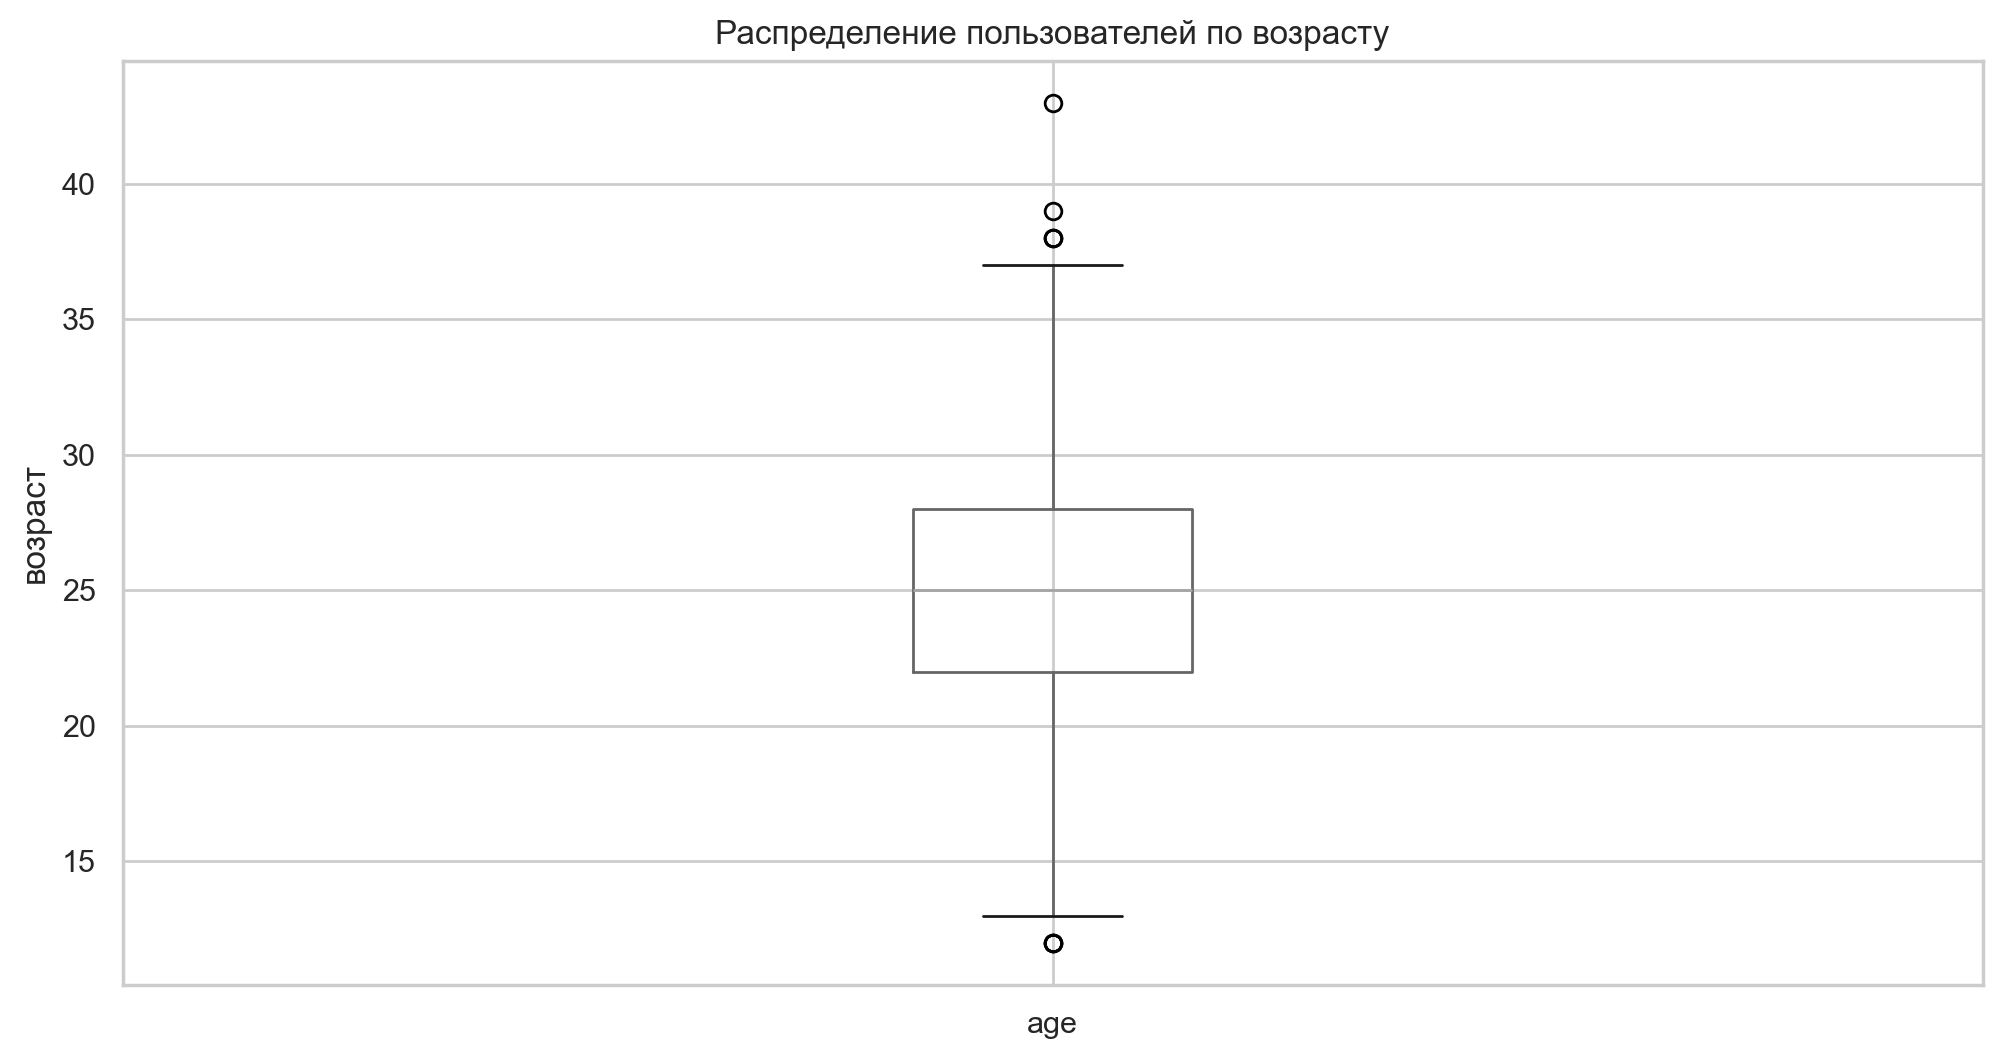

In [519]:
users_df.boxplot(column='age');
plt.title('Распределение пользователей по возрасту')
plt.ylabel('возраст')
plt.show()

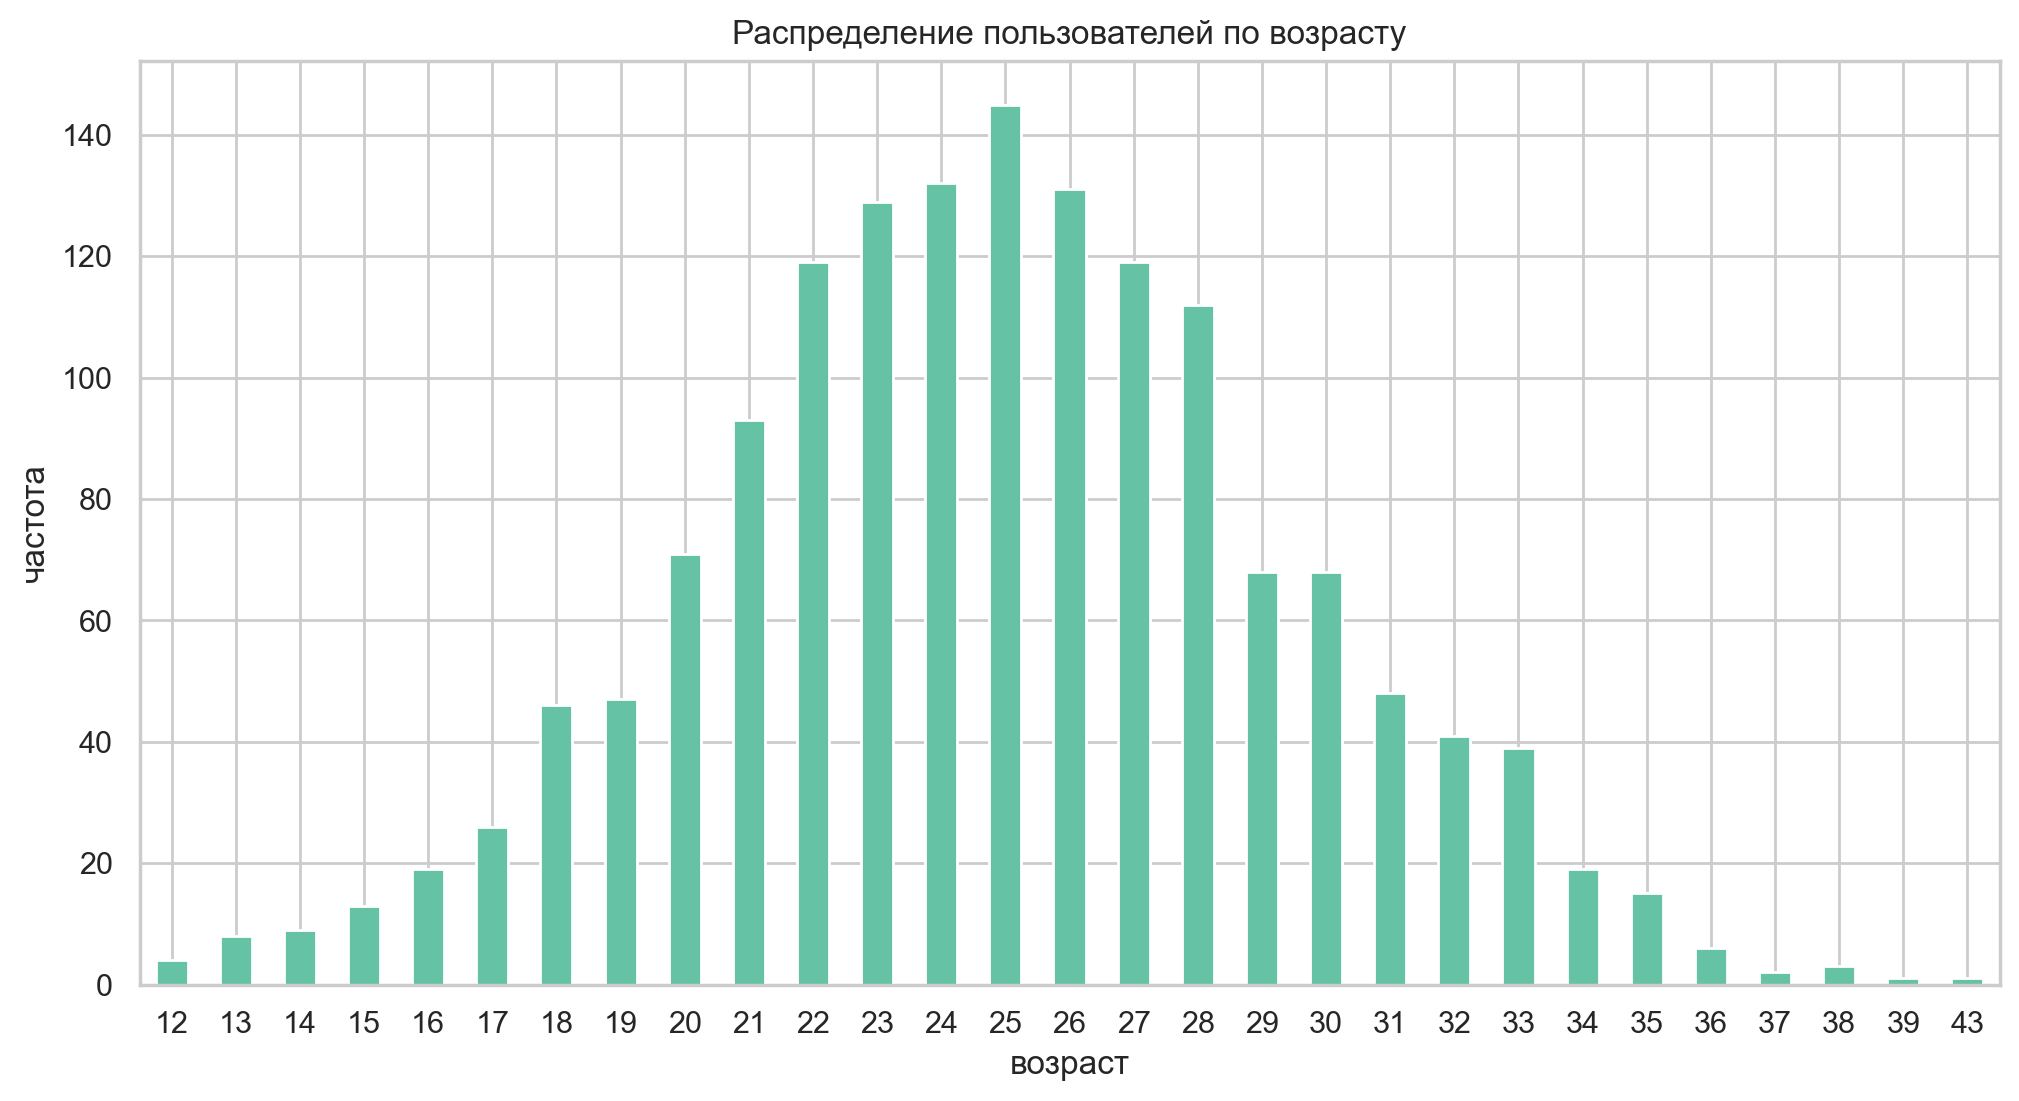

In [520]:
plt.figure(figsize=(12, 6))
users_df.groupby('age')['user_id'].count().plot.bar();
plt.title('Распределение пользователей по возрасту')
plt.xticks(rotation=0)
plt.ylabel('частота')
plt.xlabel('возраст')
plt.show()

С возрастом в целом все в порядке, за исключением минимального значения 12 лет. Нужно уточнить политику пользования сервисом проката, вероятно это допустимый возраст для пользователя.

In [522]:
# проверим на единообразие написание наименования городов в столбце город

users_df['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В столбце город все хорошо. Проверяем дальше – столбец подписка.

In [524]:
# проверим на несоответствующие значения столбец подписка

users_df['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

С данными все в порядке – неожидаемых значений нет.

Теперь проверка таблицы поездки.

In [526]:
# информация по таблице поездки

rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Пропусков нет. Только один столбец требует коррекции типа данных – дата. Поправим это.

In [528]:
# переводим строку в тип дата в столбце дата
rides_df['date'] = pd.to_datetime(rides_df['date'], format='%Y-%m-%d')

# проверим результат
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Проверим столбцы дистанцию и длительность поездки на аномалии на аномалии.

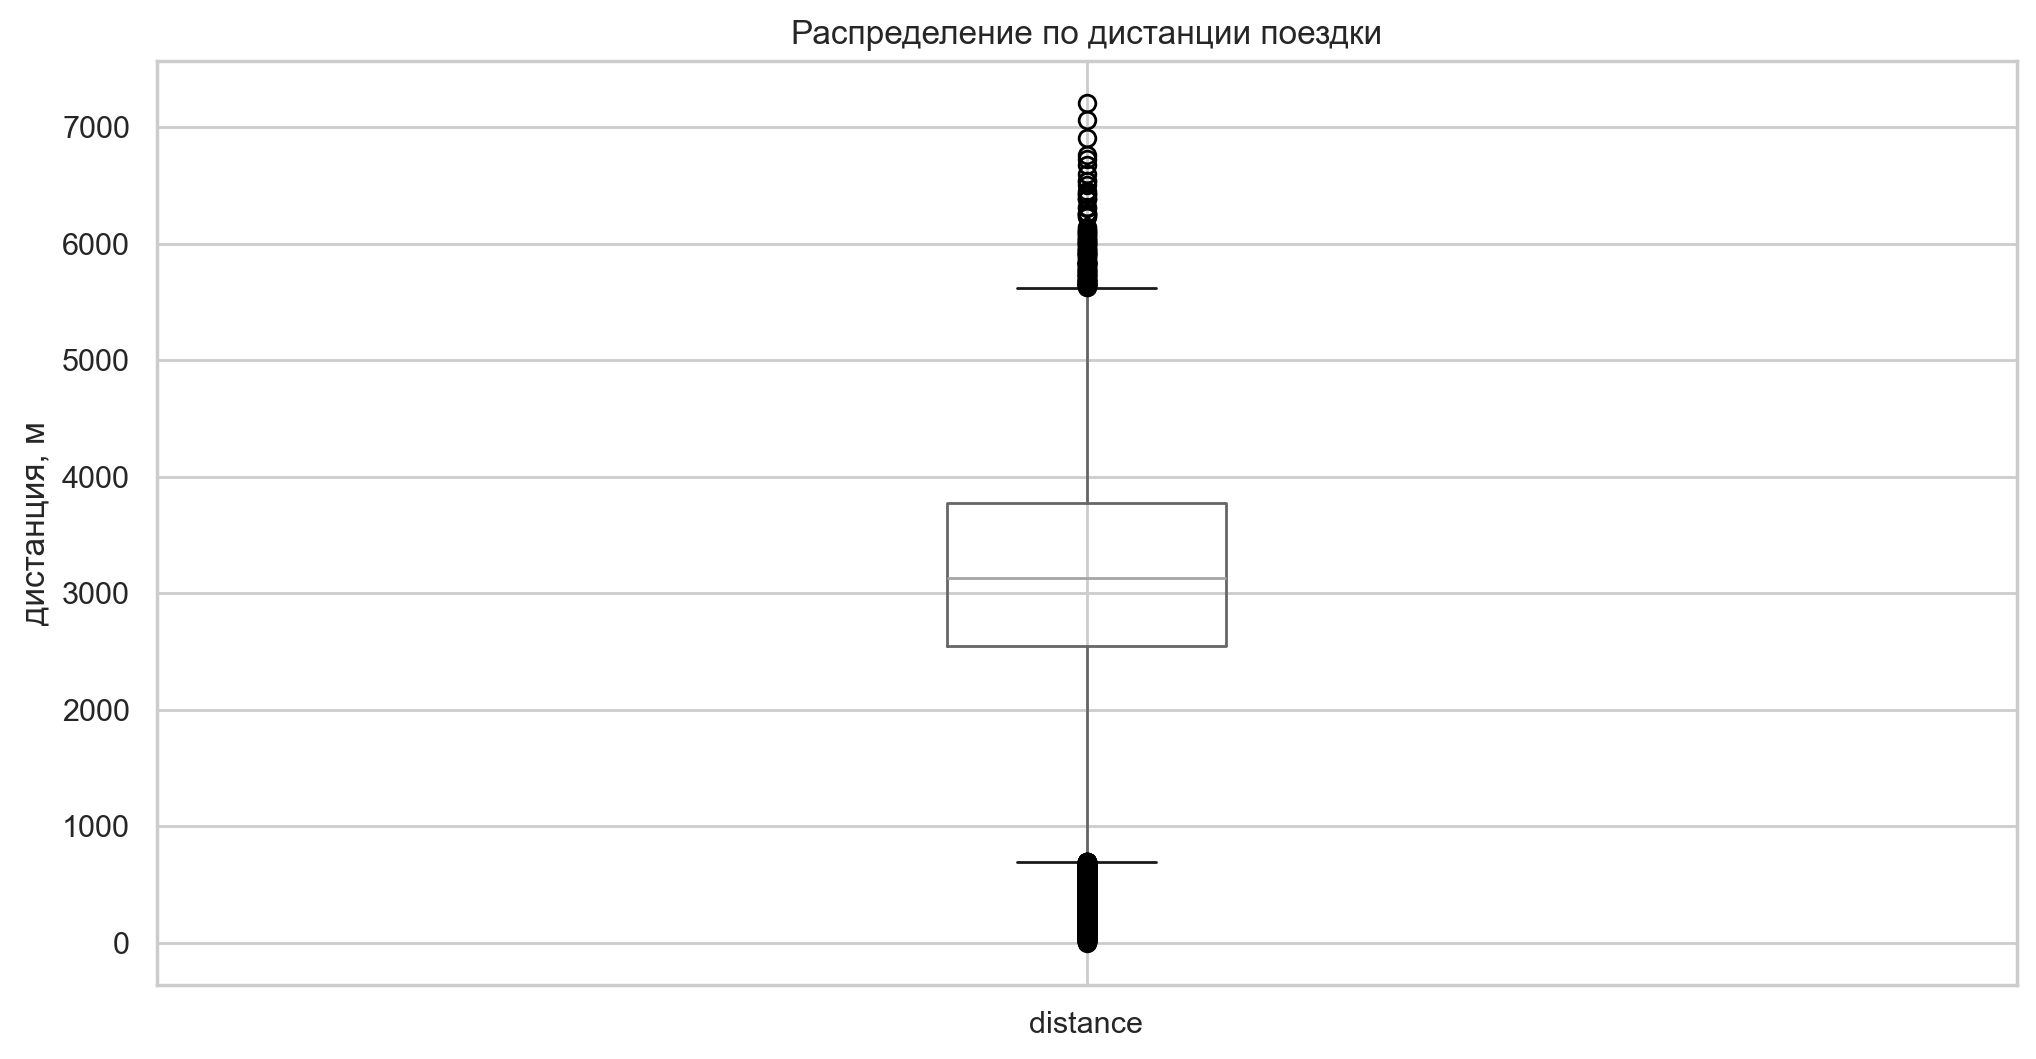

In [530]:
# боксплот для столбца дистанция
rides_df.boxplot(column='distance');
plt.title('Распределение по дистанции поездки')
plt.ylabel('дистанция, м')
plt.show()

Видим, что есть выбросы при дистанции более 5,5 тыс. м и менее 900 м. Посмотрим, сколько таких значений.

In [532]:
# узнаем процент выбросов от общего числа данных

rides_df.loc[(rides_df['distance'] > 5500) | (rides_df['distance'] < 900), 'distance'].count() \
/ rides_df['distance'].count() * 100

7.765109586008413

Выбросы в столбце дистанция составляет 7,8%, что довольно много. Решено оставить такие значения.

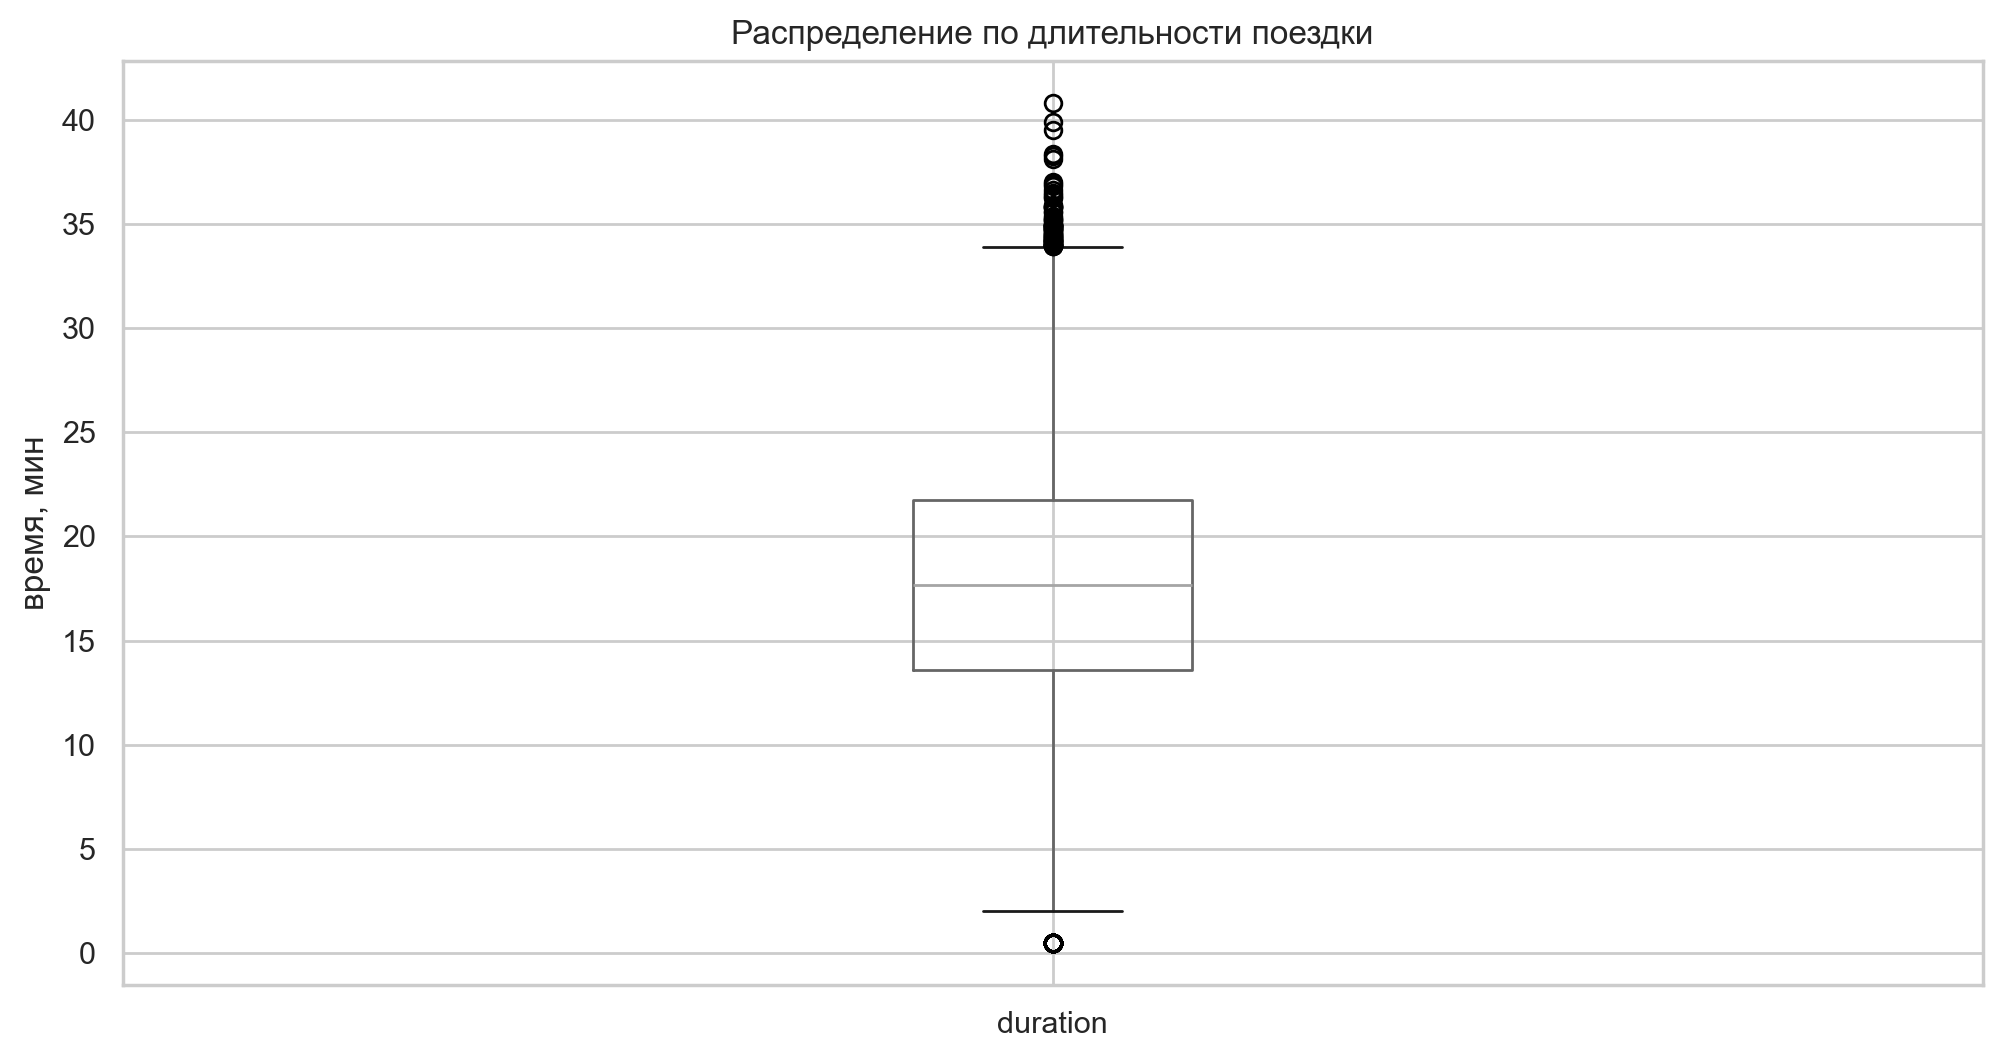

In [534]:
# боксплот для столбца длительность поездки
rides_df.boxplot(column='duration');
plt.title('Распределение по длительности поездки')
plt.ylabel('время, мин')
plt.show()

In [535]:
# узнаем процент выбросов от общего числа данных
round(rides_df.loc[(rides_df['duration'] > 35) | (rides_df['duration'] < 2), 'duration'].count() 
      / rides_df['duration'].count() * 100, 2)

0.68

Выбросы в столбце длительность поездки составляет 0,68%, что довольно не значительно. Решено оставить такие значения, так они являются вплоне вероятными и допустимыми.

Провели этапы обработки:
- в таблице данные пользователей были обнаружены строки-дубликаты, удалили их;
- в таблице поездки столбец дата изменили тип данных на дату. 

Теперь данные подготовлены к анализу.

## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:
1. частота встречаемости городов;
2. соотношение пользователей с подпиской и без подписки;
3. возраст пользователей;
4. расстояние, которое пользователь преодолел за одну поездку;
5. продолжительность поездок.

In [540]:
# частота встречаемости городов

(users_df.groupby('city')['user_id']
         .count()
         .sort_values(ascending=False))

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: user_id, dtype: int64

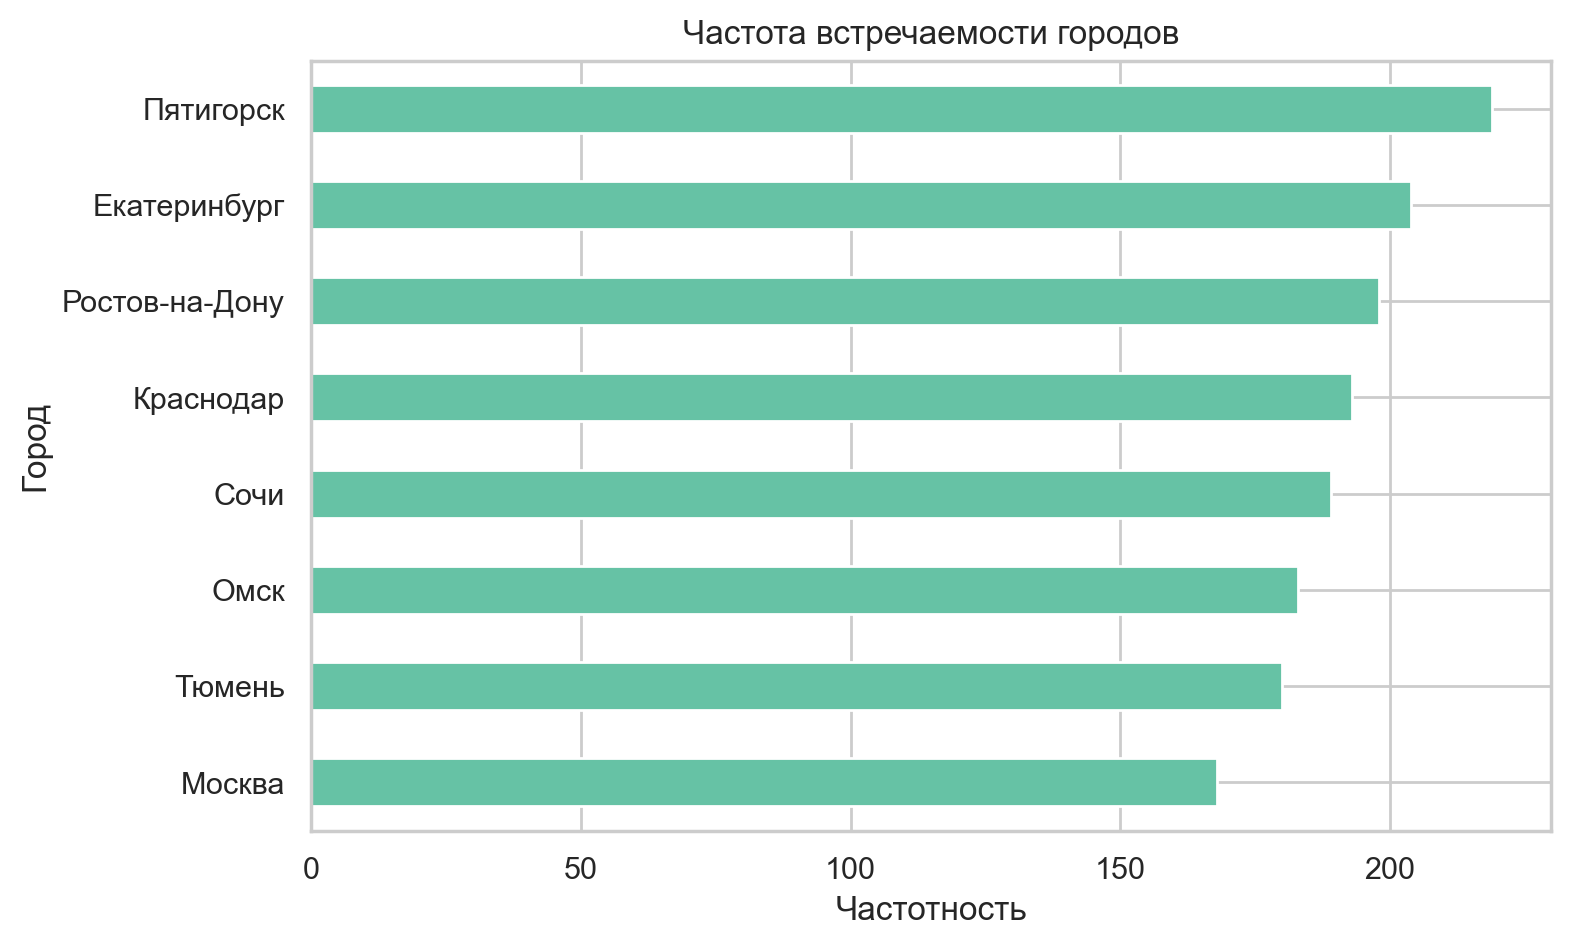

In [541]:
# визуализируем частоту встречаемости городов 
plt.figure(figsize=(8, 5))
(users_df.groupby('city')['user_id']
         .count()
         .sort_values()
         .plot.barh(title='Частота встречаемости городов', grid=True))
plt.ylabel('Город')
plt.xlabel('Частотность')
plt.show()

Больше всего сервисом пользуются пользователи из города Пятигорск – 226. В тройку также входят Екатеринбург и Ростов-на-Дону, которые имеют близкие значения – 206 и 202 соотвествтенно. Пользователи из городов Краснодар, Сочи, Омск и Тюмень распределены от 185 до 196. Наименьшую популярность имеет Москва со значением частоты встречаемости 172.

In [543]:
# соотношение пользователей с подпиской и без подписки

users_subscription_type = users_df.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
users_subscription_type['share'] = round(users_subscription_type['user_id'] / users_df['user_id'].count() * 100, 2)
users_subscription_type.rename(columns={'user_id':'count'}, inplace=True)
users_subscription_type

,count,share
subscription_type,,
free,835,54.43
ultra,699,45.57


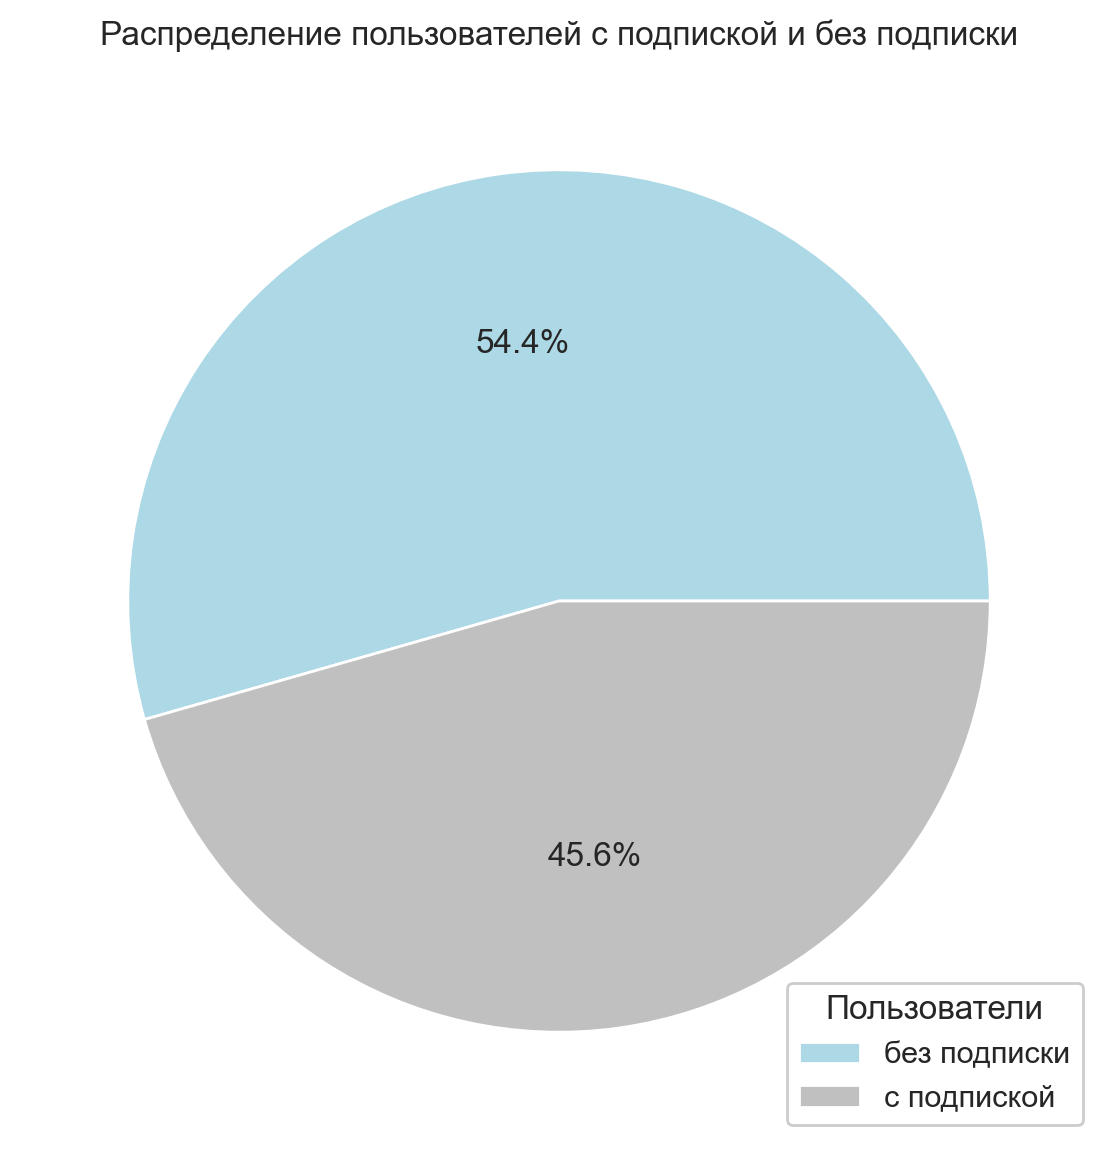

In [544]:
# визуализируем соотношение пользователей с подпиской и без подписки

plt.figure(figsize=(8, 7))
plt.pie(users_subscription_type['count'], colors=['lightblue', 'silver'], autopct='%1.1f%%')
plt.title("Распределение пользователей с подпиской и без подписки")
plt.legend(labels=['без подписки', 'с подпиской'], title='Пользователи', loc='lower right', framealpha=1)
plt.show()

Пользователей без подписки 846, их больше на 15% чем тех, кто приобрел подписку. 

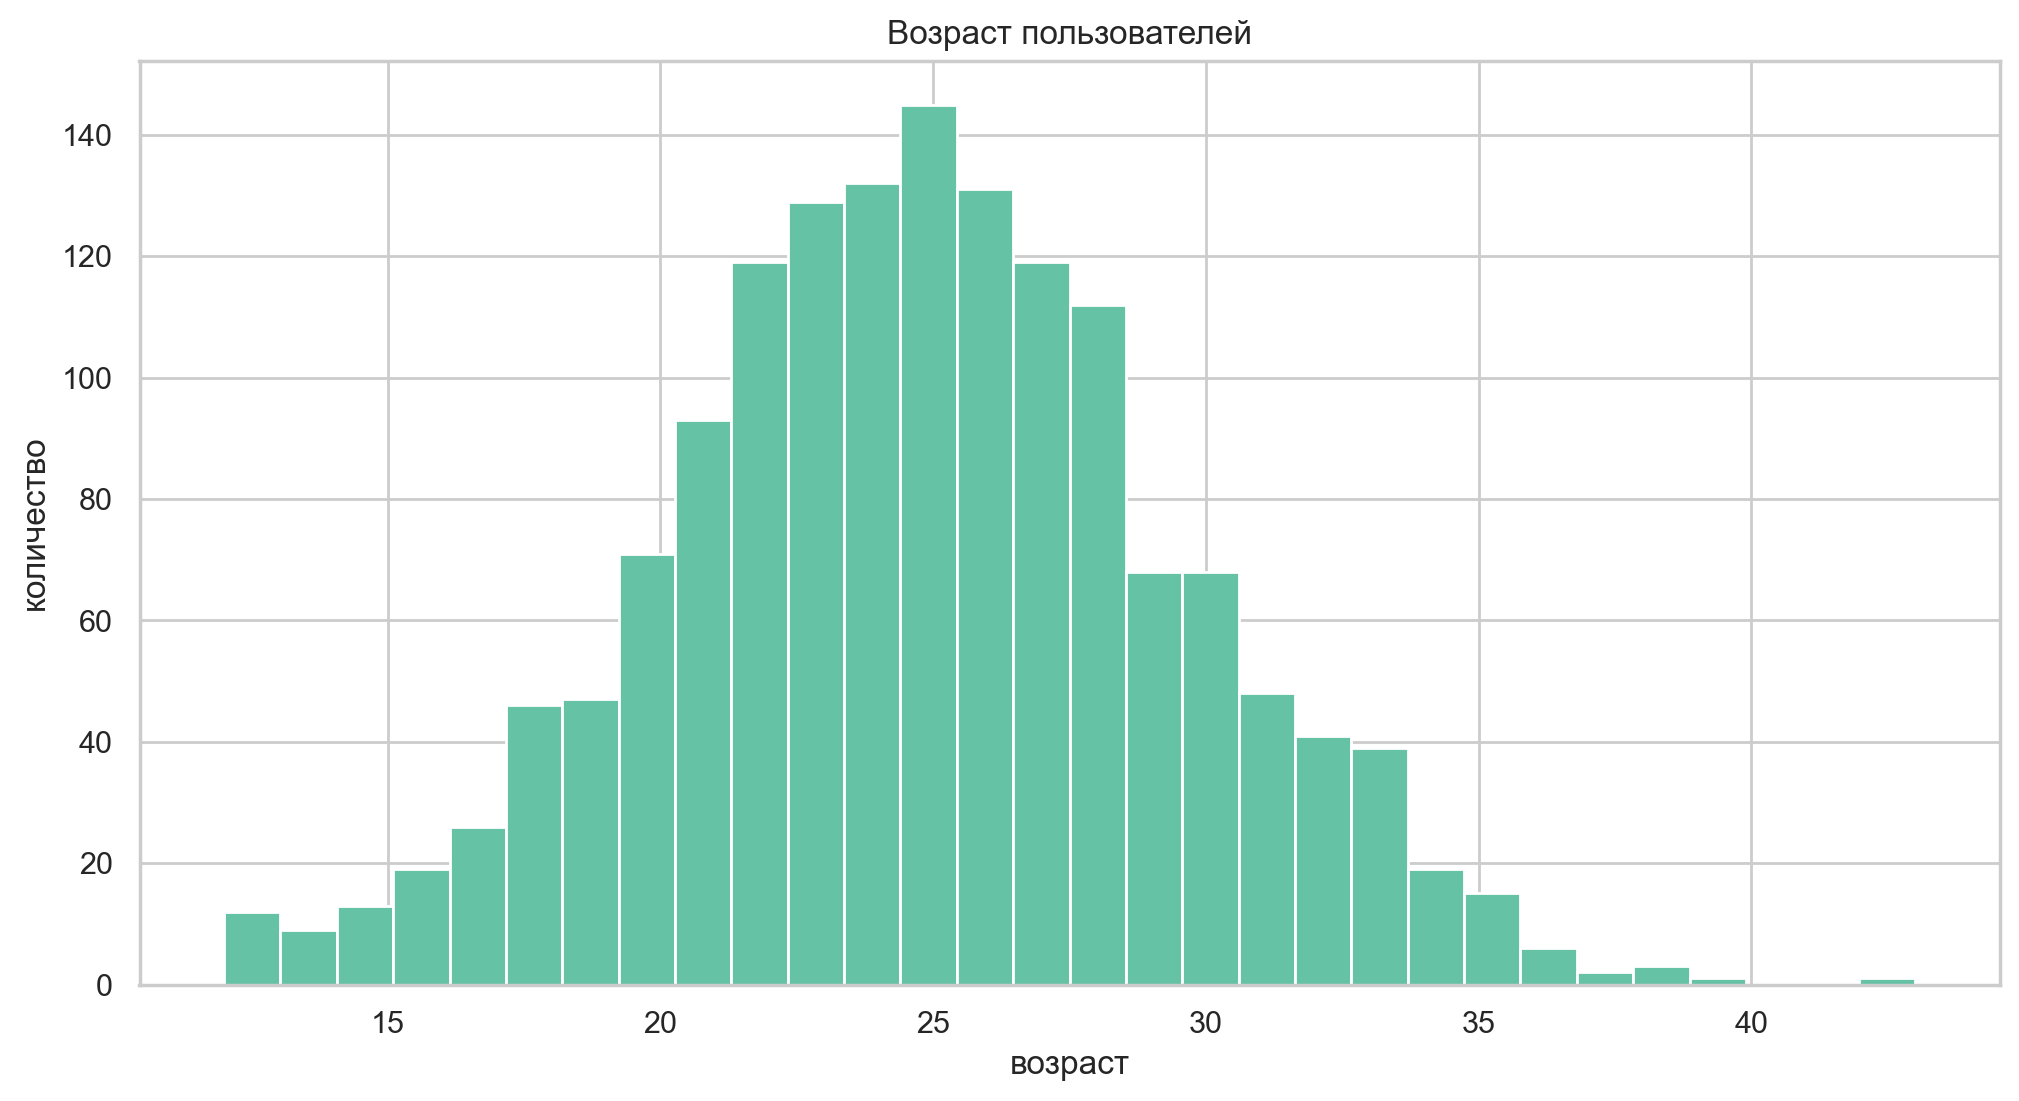

In [546]:
# возраст пользователей

plt.figure(figsize=(12, 6))
users_df['age'].plot(kind='hist', bins=30, title='Возраст пользователей', grid=True);
plt.ylabel('количество')
plt.xlabel('возраст')
plt.show()

In [547]:
users_df['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

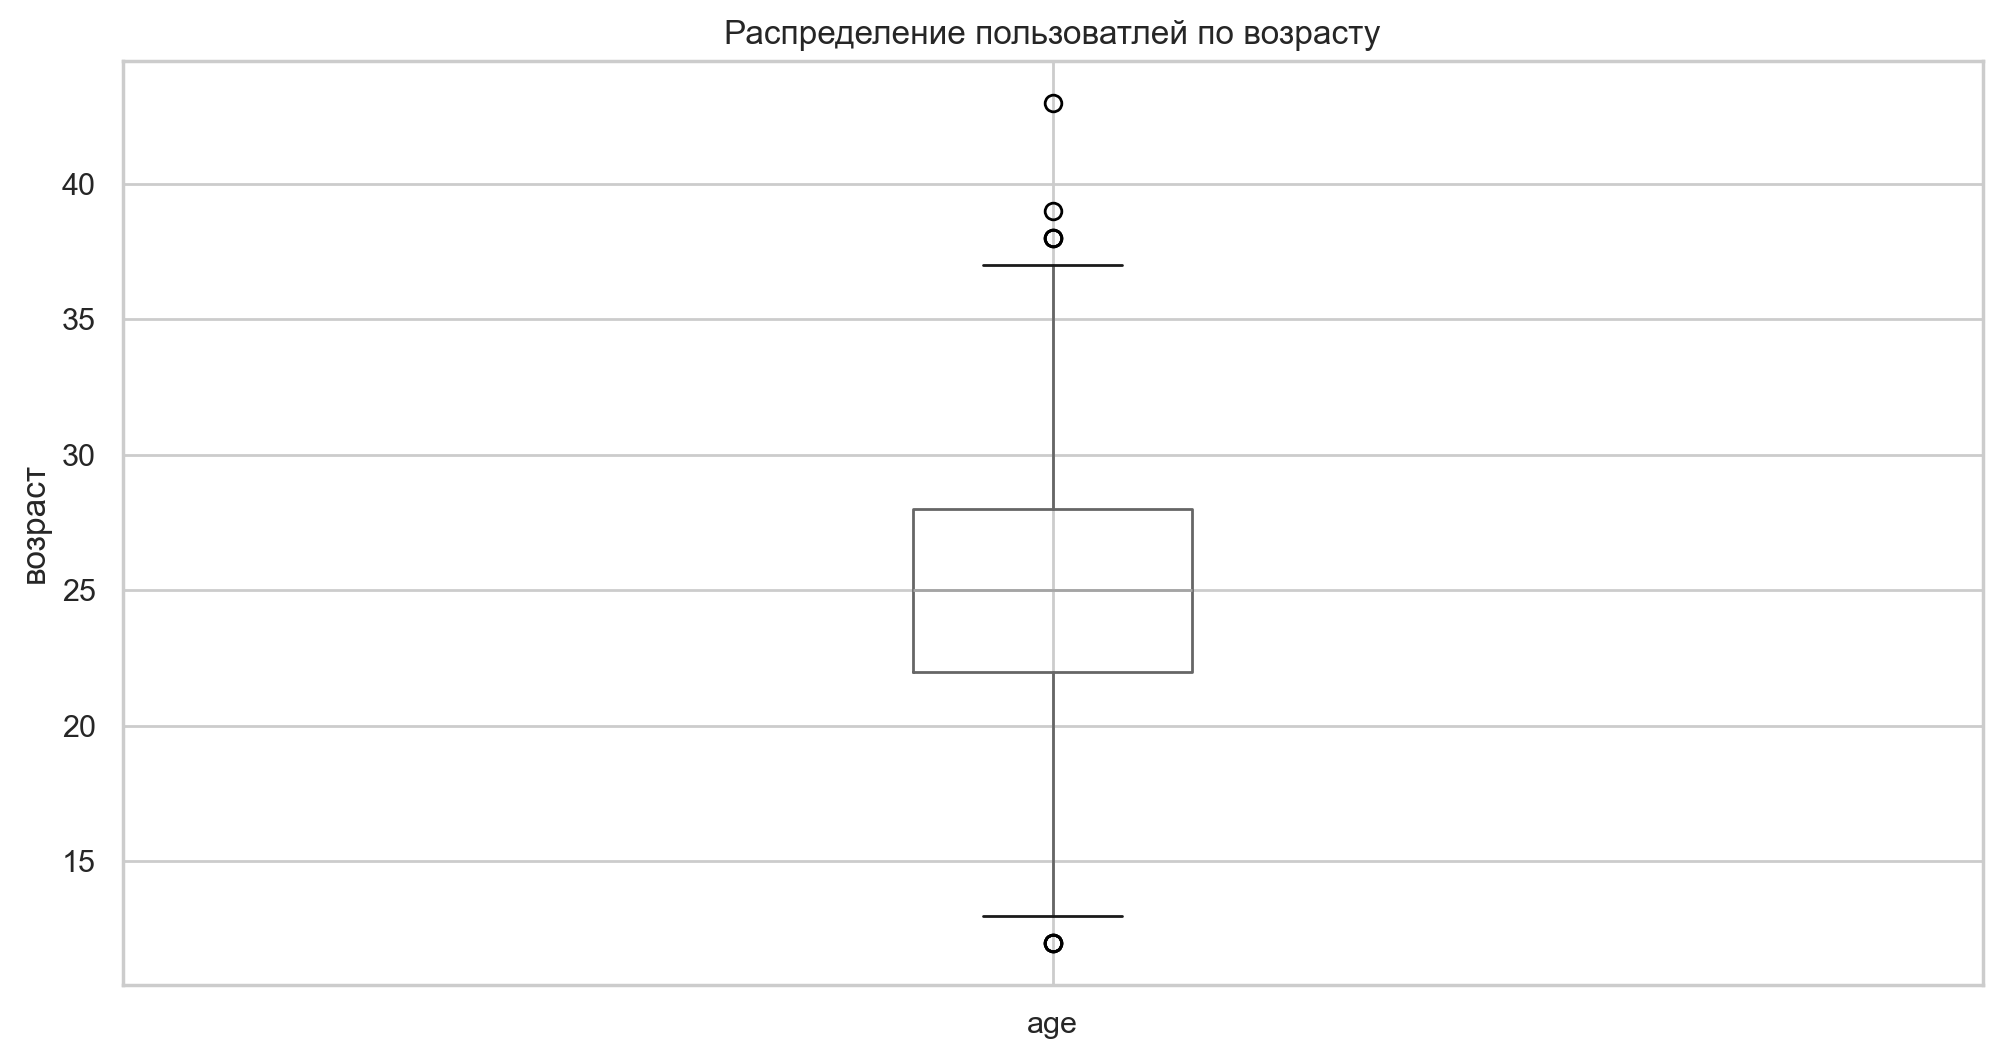

In [548]:
users_df.boxplot('age');
plt.title('Распределение пользоватлей по возрасту')
plt.ylabel('возраст')
plt.show()

Видим, что по возрасту пользователи распределены образцово – в виде нормального распределения. Средний возраст - 25 лет, половина пользователей – молодежь от 22 до 28 лет.

In [550]:
# расстояние, которое пользователь преодолел за одну поездку

rides_df['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

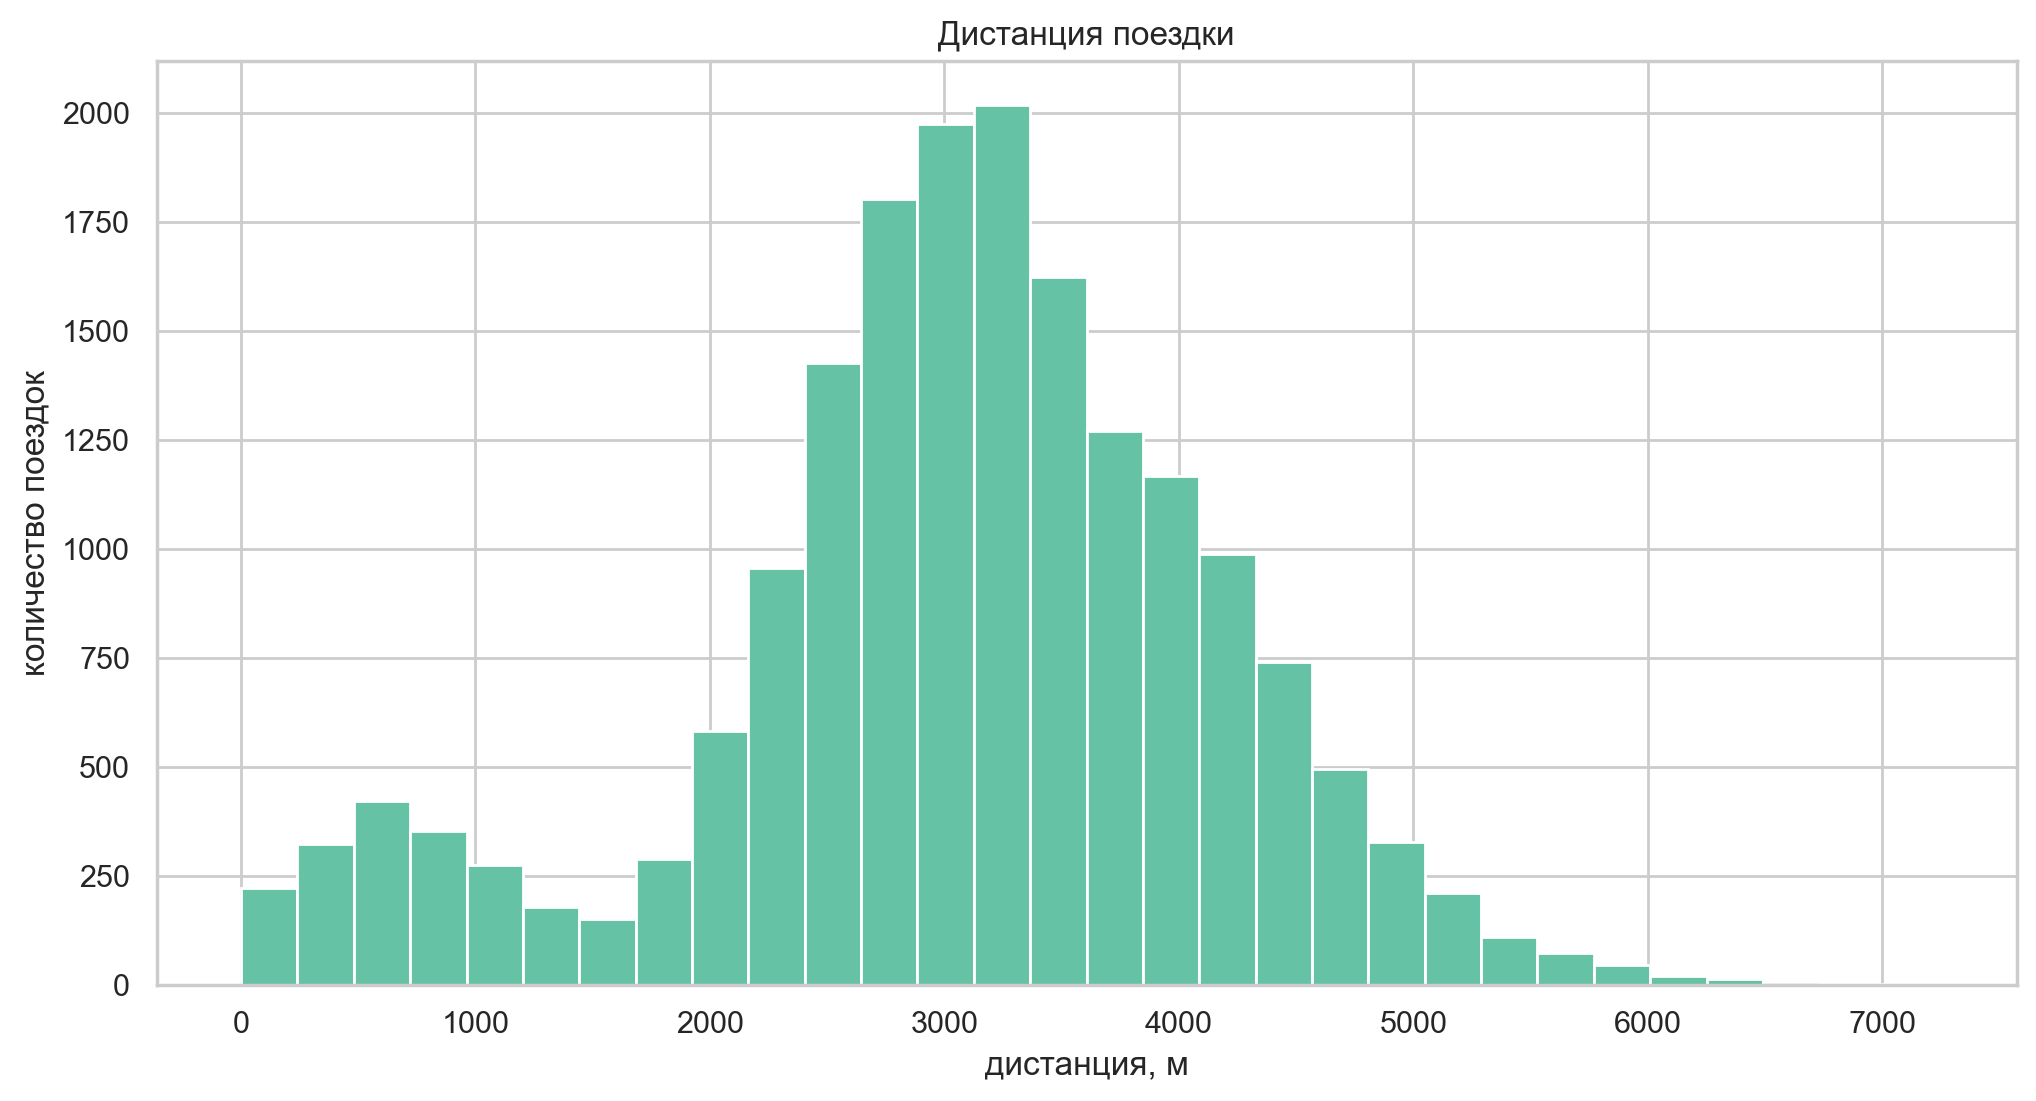

In [551]:
plt.figure(figsize=(12, 6))
rides_df['distance'].plot(kind='hist', bins=30, title='Дистанция поездки', grid=True);
plt.ylabel('количество поездок')
plt.xlabel('дистанция, м')
plt.show()

3/4 поездок имели дистанцию более 2,5 км, в среднем пользователи проезжали 3,1 км. 50% от всех поездок были совершены на дистанцию от 2,5 до 3,8 км.

In [553]:
# продолжительность поездок
round(rides_df['duration'].describe(), 2)

count    18068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

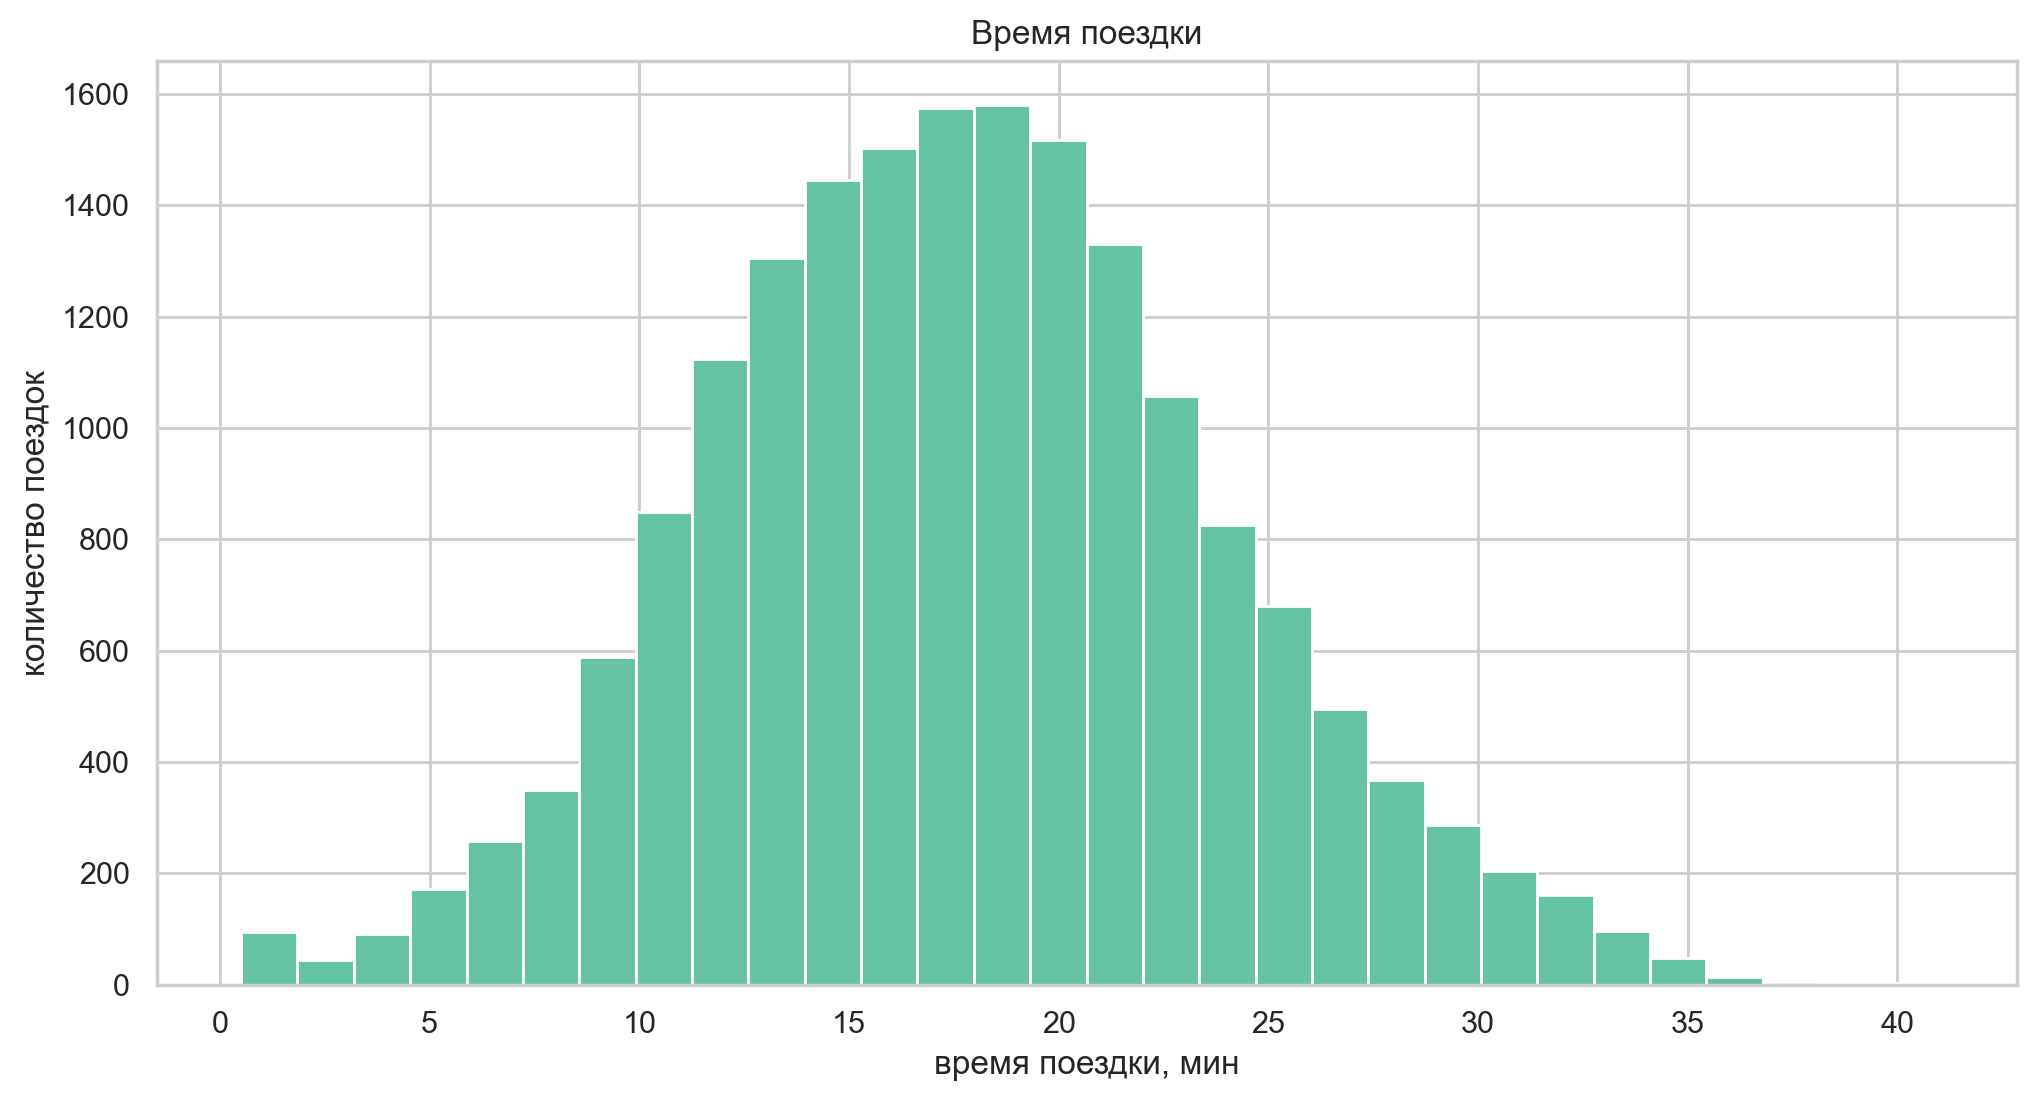

In [554]:
# график продолжительность поездок
plt.figure(figsize=(12, 6))
rides_df['duration'].plot(kind='hist', bins=30, title='Время поездки', grid=True);
plt.ylabel('количество поездок')
plt.xlabel('время поездки, мин')
plt.show()

Видим, что 3/4 всех поездок длилась более 13 мин. В среднем пользователи проезжали 18 мин. Половина всех поездок длилась от 13 до 22 мин.

**Выводы**:
- больше всего сервисом пользуются пользователи из города Пятигорск – 226. В тройку также входят Екатеринбург и Ростов-на-Дону, которые имеют близкие значения – 206 и 202 соотвествтенно. Пользователи из городов Краснодар, Сочи, Омск и Тюмень распределены от 185 до 196. Наименьшую популярность имеет город Москва - 172 пользователей;
- пользователей без подписки 846, их количество больше на 15% чем тех, кто приобрел подписку;
- Средний возраст пользователя - 25 лет, половина всех – молодежь от 22 до 28 лет;
- 3/4 поездок имели дистанцию более 2,5 км, в среднем пользователи проезжали 3,1 км. 50% от всех поездок были совершены на дистанцию в диапозоне от 2,5 до 3,8 км;
- 3/4 всех поездок длилась более 13 мин. В среднем пользователи проезжали 18 мин. Половина всех поездок длилась от 13 до 22 мин.

## Объединение данных

1. Объединим данные о пользователях, поездках и подписках в один датафрейм.
2. Создадим ещё два датафрейма из датафрейма:
    - c данными о пользователях без подписки;
    - с данными о пользователях с подпиской.
3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [559]:
# Объединим данные о пользователях, поездках и подписках в один датафрейм.

merged_data = rides_df.merge(users_df, on='user_id', how='left')
merged_data = merged_data.merge(subscriptions_df, on='subscription_type', how='left')

# проверим, что получилось
merged_data.head()

,user_id,distance,duration,date,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,Кира,22,Тюмень,ultra,6,0,199


In [560]:
# Создадим ещё два датафрейма из датафрейма: 
# c данными о пользователях без подписки и с данными о пользователях с подпиской.

free_subscription_data = merged_data[merged_data['subscription_type'] == 'free'].copy()
ultra_subscription_data = merged_data[merged_data['subscription_type'] == 'ultra'].copy()

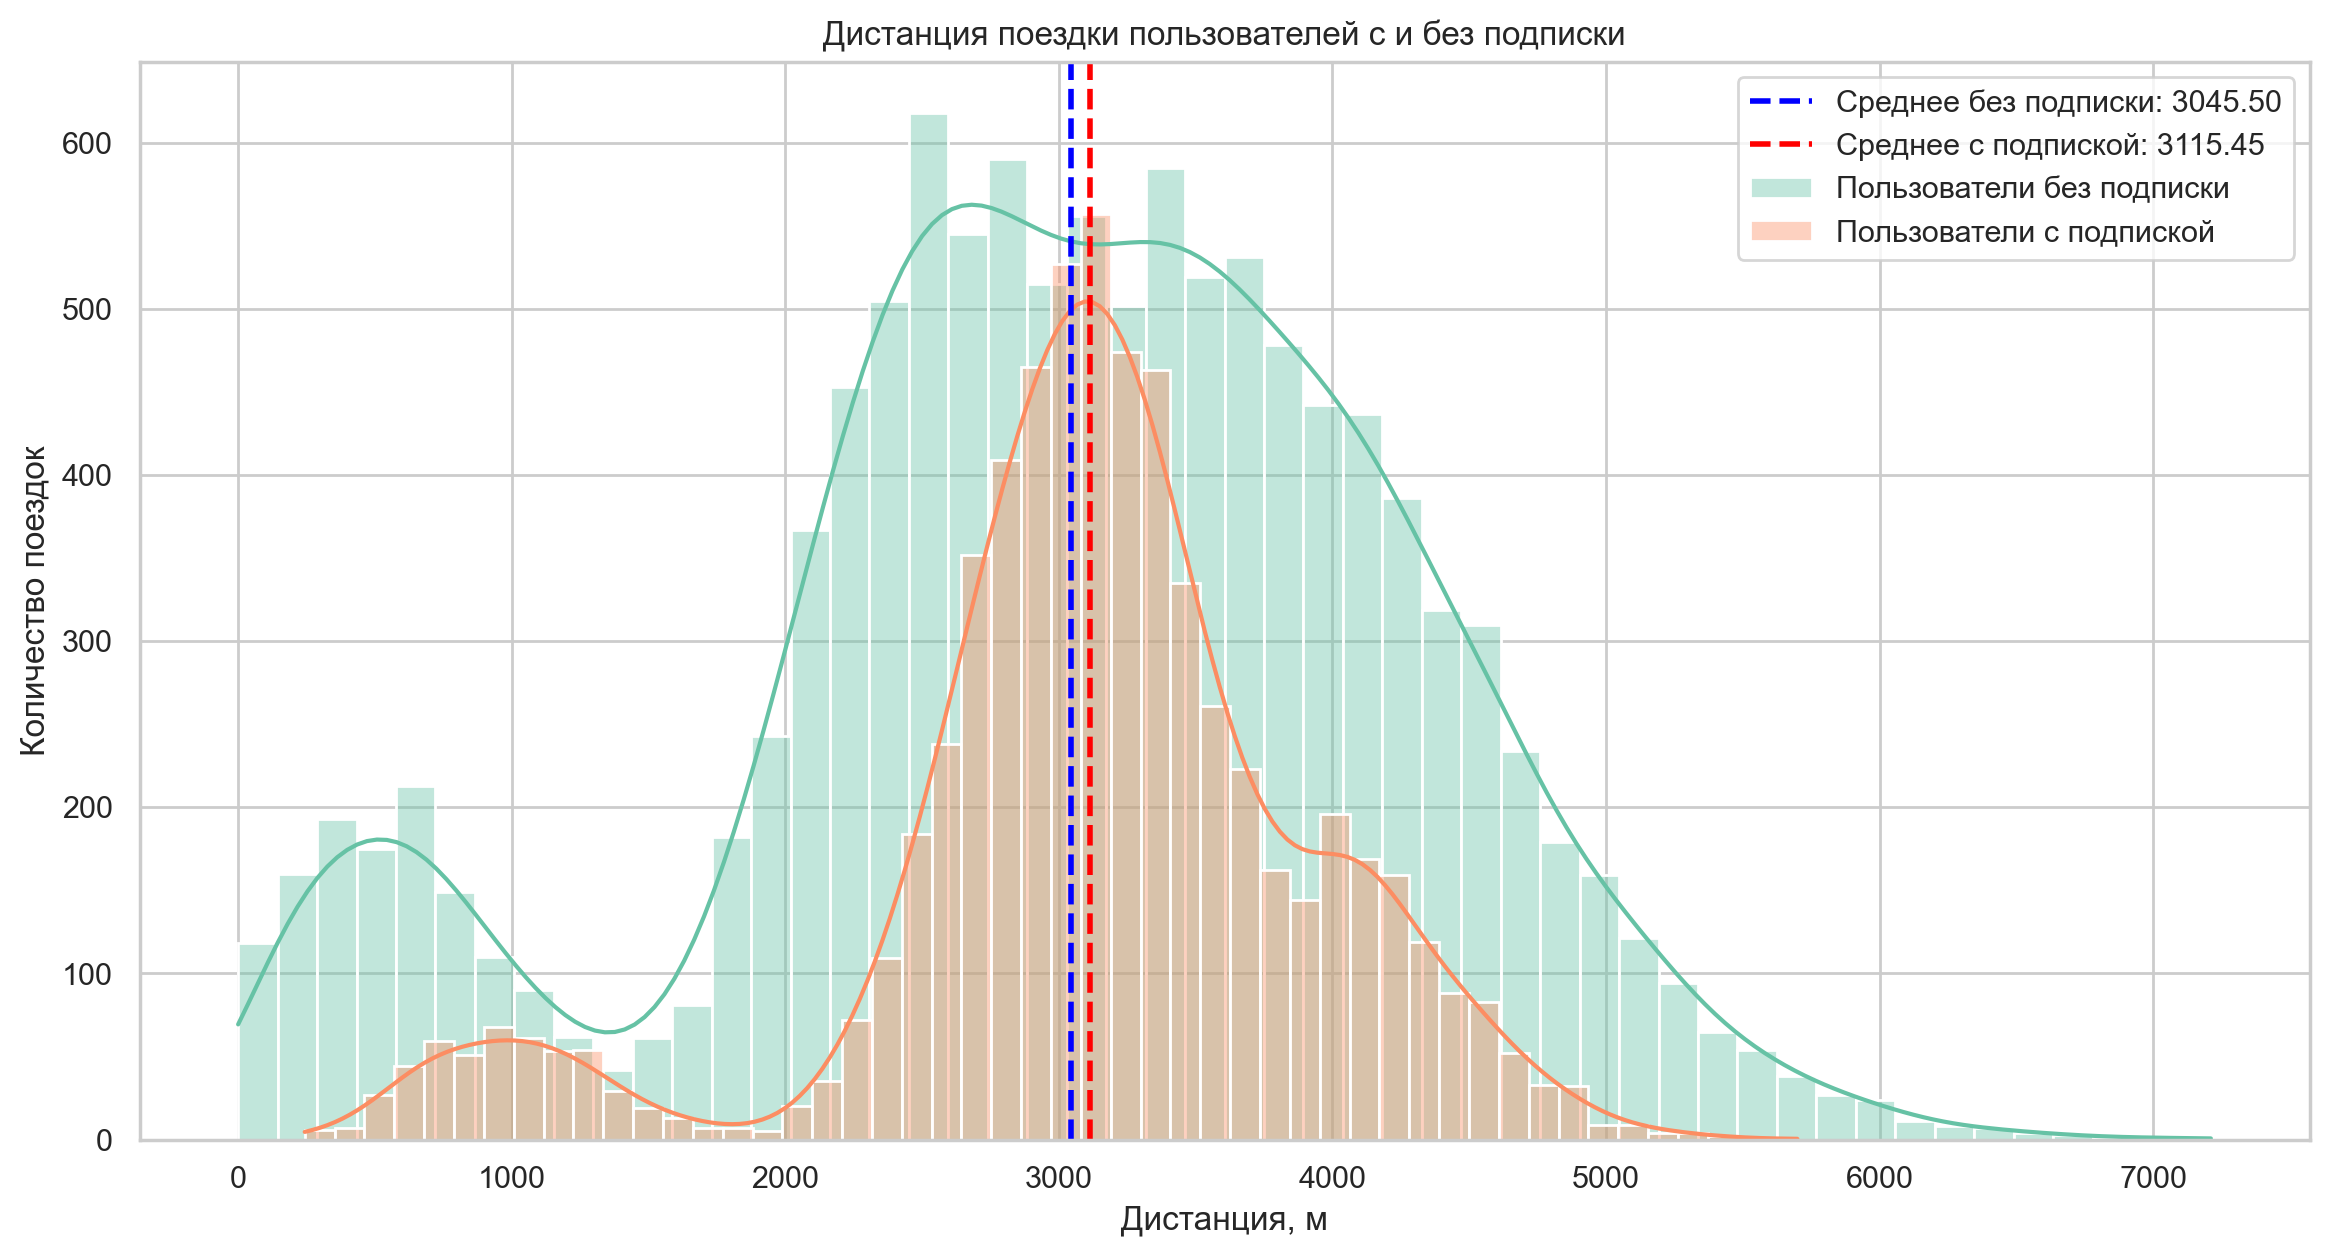

In [561]:
# считаем среднее для дистанции обеих категорий
free_mean = np.mean(free_subscription_data['distance'])
ultra_mean = np.mean(ultra_subscription_data['distance'])

# Визуализация данных о расстоянии для пользователей обеих категорий.
plt.figure(figsize=(14, 7))
sns.histplot(free_subscription_data['distance'], kde=True, label='Пользователи без подписки', bins=50, alpha=0.4)
sns.histplot(ultra_subscription_data['distance'], kde=True, label='Пользователи с подпиской', bins=50, alpha=0.4)
plt.axvline(free_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Среднее без подписки: {free_mean:.2f}')
plt.axvline(ultra_mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее с подпиской: {ultra_mean:.2f}')
plt.title('Дистанция поездки пользователей с и без подписки')
plt.xlabel('Дистанция, м')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

Видим, что пользователи без подписки совершали больше поездок, есть два пика: 500 м и 3 км, схожее распределение у пользователей с подпиской - 1 и 3 км.
Видим различия в распределении между двумя группами: пользователи с подпиской чаще совершали поездки, близкие по дистанции к 3,1 км, тогда как пользователи без подписки - 3 км.

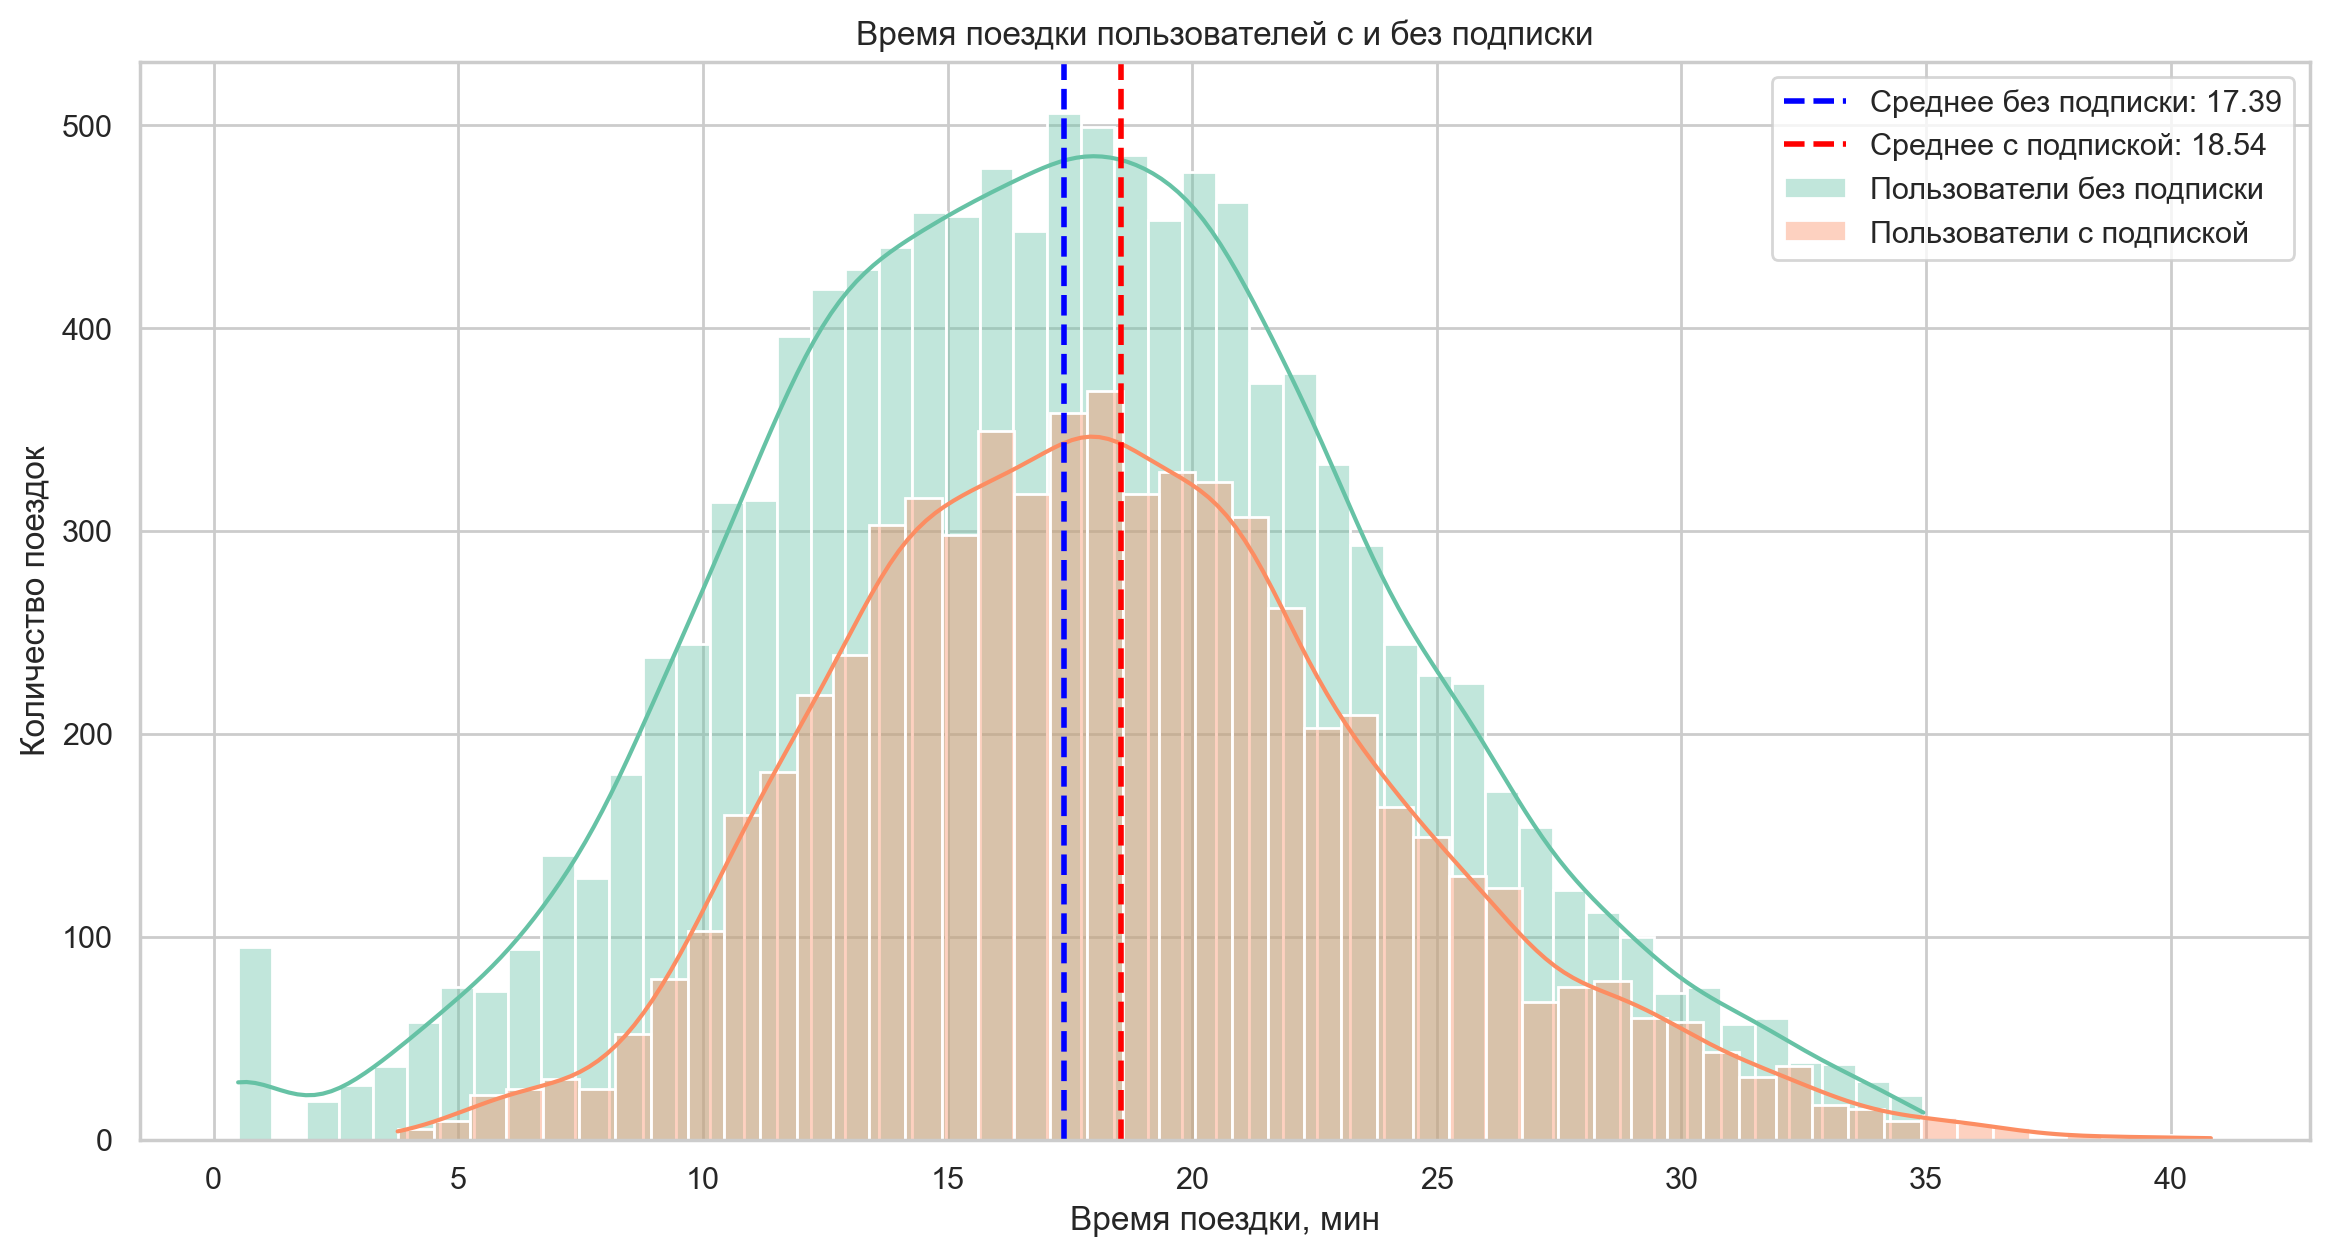

In [563]:
# считаем среднее для времени поездки обеих категорий
free_mean = np.mean(free_subscription_data['duration'])
ultra_mean = np.mean(ultra_subscription_data['duration'])

# Визуализация данных о времени поездки для пользователей обеих категорий.
plt.figure(figsize=(14, 7))
sns.histplot(free_subscription_data['duration'], kde=True, label='Пользователи без подписки', bins=50, alpha=0.4)
sns.histplot(ultra_subscription_data['duration'], kde=True, label='Пользователи с подпиской', bins=50, alpha=0.4)
plt.axvline(free_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Среднее без подписки: {free_mean:.2f}')
plt.axvline(ultra_mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее с подпиской: {ultra_mean:.2f}')
plt.title('Время поездки пользователей с и без подписки')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

Видим, что по времени обе категории пользователей имют подобное нормальное распределение, различие в среднем длительности поездки равна 5,5% – пользователи с подпиской проезжали в среднем 18,5 мин, без подписки – 17,4 мин.

**Выводы**:
- пользователи без подписки совершали больше поездок, есть два пика: 500 м и 3 км, схожее распределение у пользователей с подпиской - 1 и 3 км. Видим различия в 3,3% в распределении между двумя группами: пользователи с подпиской чаще совершали поездки, близкие по дистанции к 3,1 км, тогда как пользователи без подписки - 3 км.
- по времени обе категории пользователей имют подобное нормальное распределение, различие в среднем длительности поездки равна 5,5% – пользователи с подпиской проезжали в среднем 18,5 мин, без подписки – 17,4 мин.

### Подсчёт выручки

Найдем следующие показатели по данным:

- создадим таблицу с агрегированными данными о поездках, где найдем суммарное расстояние, количество поездок, суммарное время для каждого пользователя за каждый месяц;
- добавим столбец с выручкой, которую принёс каждый пользователь (продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа).

Помесячную выручку считаем по формуле: 
стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [568]:
# посмотрим за какой преиод представленны данные
min(merged_data['date']), max(merged_data['date'])

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

Данные представлены за 12 месяцев 2021 года.

In [570]:
# добавим столбец с месяцами
merged_data['month'] = merged_data['date'].dt.month

In [571]:
# округляем вверх значение продолжительность поездки перед агрегацией
merged_data['duration'] = np.ceil(merged_data['duration'])

In [572]:
# построим сводную таблицу, где рассчитаем суммарное расстояние, количество поездок
# и суммарное время для каждого пользователя за каждый месяц

summerized_data = \
(merged_data.pivot_table(index=['month', 'user_id'], 
                        values=['distance', 'duration', 'subscription_type', 'minute_price', 
                                'start_ride_price', 'subscription_fee'], 
                        aggfunc={'distance': 'sum', 'duration': 'sum', 'user_id': 'count',
                                'subscription_type':'first', 'minute_price':'first', 
                                'start_ride_price':'first', 'subscription_fee':'first'})
            .rename(columns={'user_id':'ride_count'})
            .reset_index())

# выведим несколько строк сводной таблицы
summerized_data

,month,user_id,distance,duration,minute_price,start_ride_price,subscription_fee,subscription_type,ride_count
0,1,1,7027.511294,42.0,6,0,199,ultra,2
1,1,3,3061.777147,13.0,6,0,199,ultra,1
2,1,5,3914.646990,13.0,6,0,199,ultra,1
3,1,7,6478.080979,28.0,6,0,199,ultra,2
4,1,12,3577.151148,33.0,6,0,199,ultra,1
...,...,...,...,...,...,...,...,...,...
11326,12,1525,4597.854350,34.0,8,50,0,free,1
11327,12,1526,3644.121544,23.0,8,50,0,free,1
11328,12,1528,3998.569324,11.0,8,50,0,free,1
11329,12,1532,6111.889853,42.0,8,50,0,free,2


In [573]:
# Создадим функцию, которая считает выручку: 
# стоимость старта поездки × количество поездок +
# стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + 
# стоимость подписки.
def revenue_calc(row):
        # считаем выручку по формуле
        revenue = (row['start_ride_price'] * row['ride_count'] + 
        row['duration'] * row['minute_price'] + 
        row['subscription_fee'])
        return revenue

In [574]:
# добавим столбец с помесячной выручкой, которую принёс каждый пользователь
summerized_data['revenue'] = summerized_data.apply(revenue_calc, axis=1)

In [575]:
# подсчитаем выручку по месяцам
((summerized_data.groupby('month')['revenue'].sum() / 1000)
                 .plot.bar(ylim=(250, 350), 
                           xlabel='Месяц', 
                           ylabel='Выручка, тыс. руб', 
                           title='Выручка по месяцам',
                           figsize=(10, 7)));

In [576]:
# значения по месяцам
summerized_data.groupby('month')['revenue'].sum()

month
1     337958.0
2     290428.0
3     329822.0
4     322916.0
5     337265.0
6     335978.0
7     328504.0
8     325650.0
9     323037.0
10    315360.0
11    305622.0
12    326101.0
Name: revenue, dtype: float64

In [577]:
# сумма выручки за 2021
summerized_data['revenue'].sum()

3878641.0

Выручка за 2021 составила 3 878 641 рублей. Самыми прибыльными месяцами, которые принесли более 330 тыс. рублей, являются январь, май и июнь. Меньше всего принесли февраль и ноябырь - 290 428 и 305 622 рублей соответственно.

In [579]:
# в каждом месяце пользователь встречается только 1 раз
summerized_data[summerized_data['user_id'] == 70]

,month,user_id,distance,duration,minute_price,start_ride_price,subscription_fee,subscription_type,ride_count,revenue
32,1,70,6062.977274,43.0,6,0,199,ultra,2,457.0
1032,2,70,3378.415932,13.0,6,0,199,ultra,1,277.0
1909,3,70,4206.640460,26.0,6,0,199,ultra,1,355.0
2864,4,70,8016.211843,33.0,6,0,199,ultra,2,397.0
3783,5,70,7103.350711,36.0,6,0,199,ultra,2,415.0
6712,8,70,3479.511091,27.0,6,0,199,ultra,1,361.0


## Исследование и проверка гипотез

Исследуем следующие вопросы на основе данных:
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки?
2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Ответим на вопрос: "Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?"

### Пользователи с подпиской и длительность поездки

Исследуем длительность поездки в зависимости от подписки. Проверим гипотезы:
- нулевая гипотеза: нет различий по времени на поездки между пользователями без и с подпиской;
- альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки.

In [583]:
# посмотрим, сколько времени в среднем тратят пользователи с и без подписки
merged_data.pivot_table(index='subscription_type', values='duration', aggfunc='mean').assign(
    differance=merged_data.groupby('subscription_type')['duration'].mean().diff())

,duration,differance
subscription_type,,
free,17.890992,NaN
ultra,19.037692,1.1467


In [584]:
# Выполнение односторонний t-теста для независимых выборок проверки гипотезы
free_mean = np.mean(free_subscription_data['duration'])
ultra_mean = np.mean(ultra_subscription_data['duration'])

t_stat, p_value = st.ttest_ind(ultra_subscription_data['duration'], free_subscription_data['duration'], 
                               alternative='greater')

print('p-value', p_value)

# Оценка результатов
if p_value < 0.01:
    print("Отвергаем нулевую гипотезу в пользу альтернативной: пользователи с подпиской тратят больше времени на поездки")
    print(f'Различие: {ultra_mean - free_mean:.2f} мин')
else:
    print("Не отвергаем нулевую гипотезу: недостаточно доказательств, что есть различия по времени на поездки между пользователями без и с подпиской")

p-value 1.2804098316645618e-34
Отвергаем нулевую гипотезу в пользу альтернативной: пользователи с подпиской тратят больше времени на поездки
Различие: 1.15 мин


**Вывод:** гипотеза о том, что пользователи с подпиской в среднем тратят в поездке больше времени, чем пользователи без подписки, потвердилась на уровне значимости 0,01. Различие составило 1,2 мин. В среднем пользователи с подпиской тратят 18,5 мин на поездку, без подписки - 17,4 мин.

### Пользователи с подпиской и длительность поездки

Исследуем расстояние, которое проезжают пользователи с подпиской за одну поездку. Проверим гипотезы:
- нулевая гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров;
- альтернативная гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

In [587]:
# посмотрим на среднее расстояние, которое проезжают пользователи с подпиской за одну поездку
ultra_subscription_data['distance'].mean()

3115.4453880370247

In [588]:
# Выполнение одновыборочного t-теста для проверки гипотезы

ultra_distance_mean = np.mean(ultra_subscription_data['distance'])

t_stat, p_value = st.ttest_1samp(ultra_subscription_data['distance'], 3130, alternative='less')

print('p-value', p_value)

# Оценка результатов
if p_value < 0.01:
    print("Отвергаем нулевую гипотезу в пользу альтернативной: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров")
    print(f'Средняя дистанция: {ultra_distance_mean:.2f} м')
else:
    print("Не отвергаем нулевую гипотезу: недостаточно доказательств, что расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров")

p-value 0.08046311521502147
Не отвергаем нулевую гипотезу: недостаточно доказательств, что расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров


**Вывод:** не отвергаем нулевую гипотезу: недостаточно доказательств, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не равно 3130 метров.

### Выручка от пользователей с и без подписки

Исследуем помесячную выручку от пользователей с подпиской и без подписки. Проверим гипотезы:
- нулевая гипотеза: помесячная выручка от пользователей с подпиской и без подписки не различается;
- альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [591]:
#  помесячная выручка от пользователей без и с подпиской по месяцам

subscr_type_revenue = summerized_data.pivot_table(index=['month', 'subscription_type'], 
                                                 values='revenue', aggfunc='mean').reset_index()

In [592]:
# Агрегируем данные по месяцам и типам  
monthly_revenue = subscr_type_revenue.groupby(['month', 'subscription_type']).sum().unstack(fill_value=0)  

# переименуем и уберем двухуровневую индексацию столбцов
monthly_revenue.columns = ['free', 'ultra']

In [593]:
# Выполнение односторонний t-теста для независимых выборок проверки гипотезы
free_revenue_mean = np.mean(monthly_revenue['free'])
ultra_revenue_mean = np.mean(monthly_revenue['ultra'])

t_stat, p_value = st.ttest_ind(monthly_revenue['ultra'], monthly_revenue['free'], 
                               alternative='greater')

print('p-value', p_value)

# Оценка результатов
if p_value < 0.01:
    print("Отвергаем нулевую гипотезу в пользу альтернативной: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки")
    print(f'Различие: {ultra_revenue_mean - free_revenue_mean:.2f} руб.')
else:
    print("Не отвергаем нулевую гипотезу: недостаточно доказательств, что есть различия помесячной выручки от пользователей с подпиской и без подписки")

print('Средняя выручка пользователей с подпиской:', ultra_revenue_mean)
print('Средняя выручка пользователей без подписки:', free_revenue_mean)

p-value 8.517956987709186e-13
Отвергаем нулевую гипотезу в пользу альтернативной: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
Различие: 34.07 руб.
Средняя выручка пользователей с подпиской: 362.6696445163377
Средняя выручка пользователей без подписки: 328.5980672488633


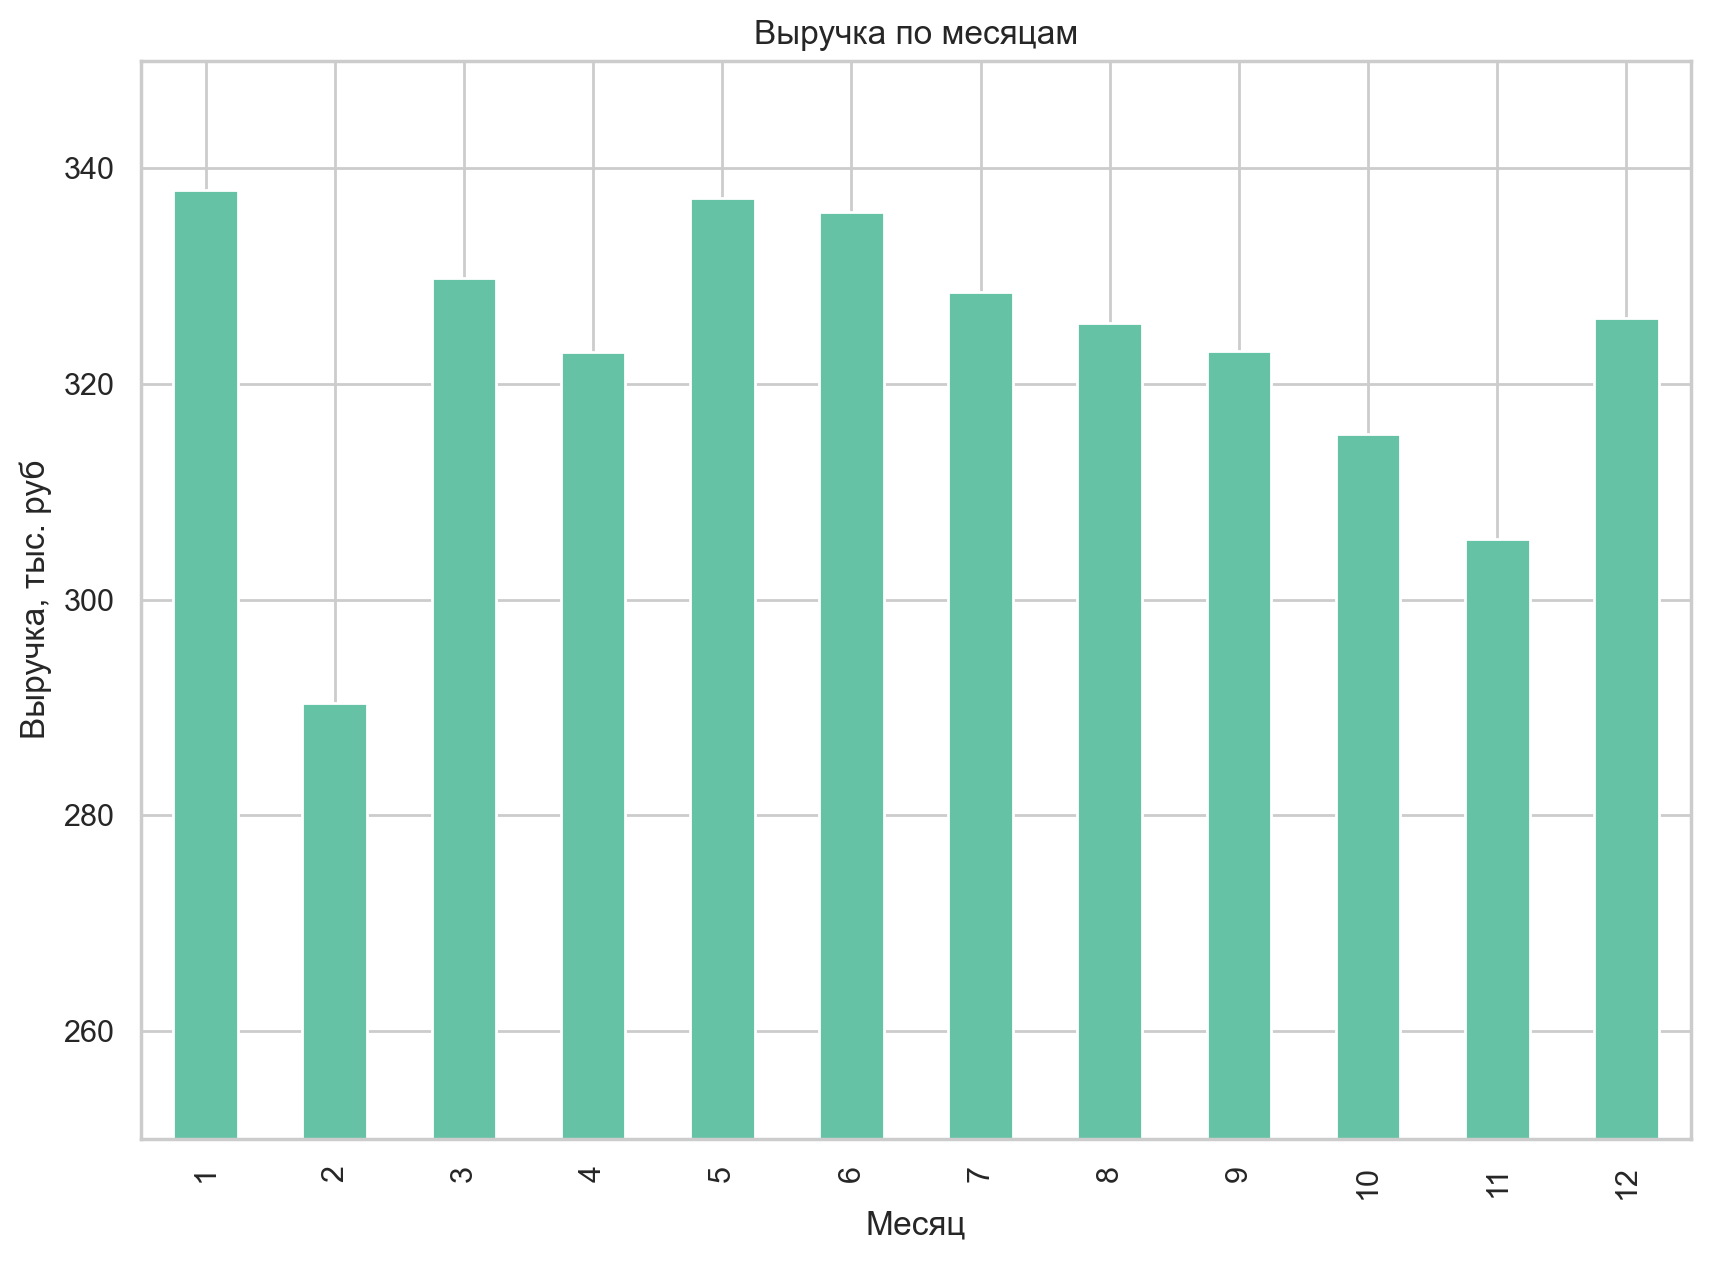

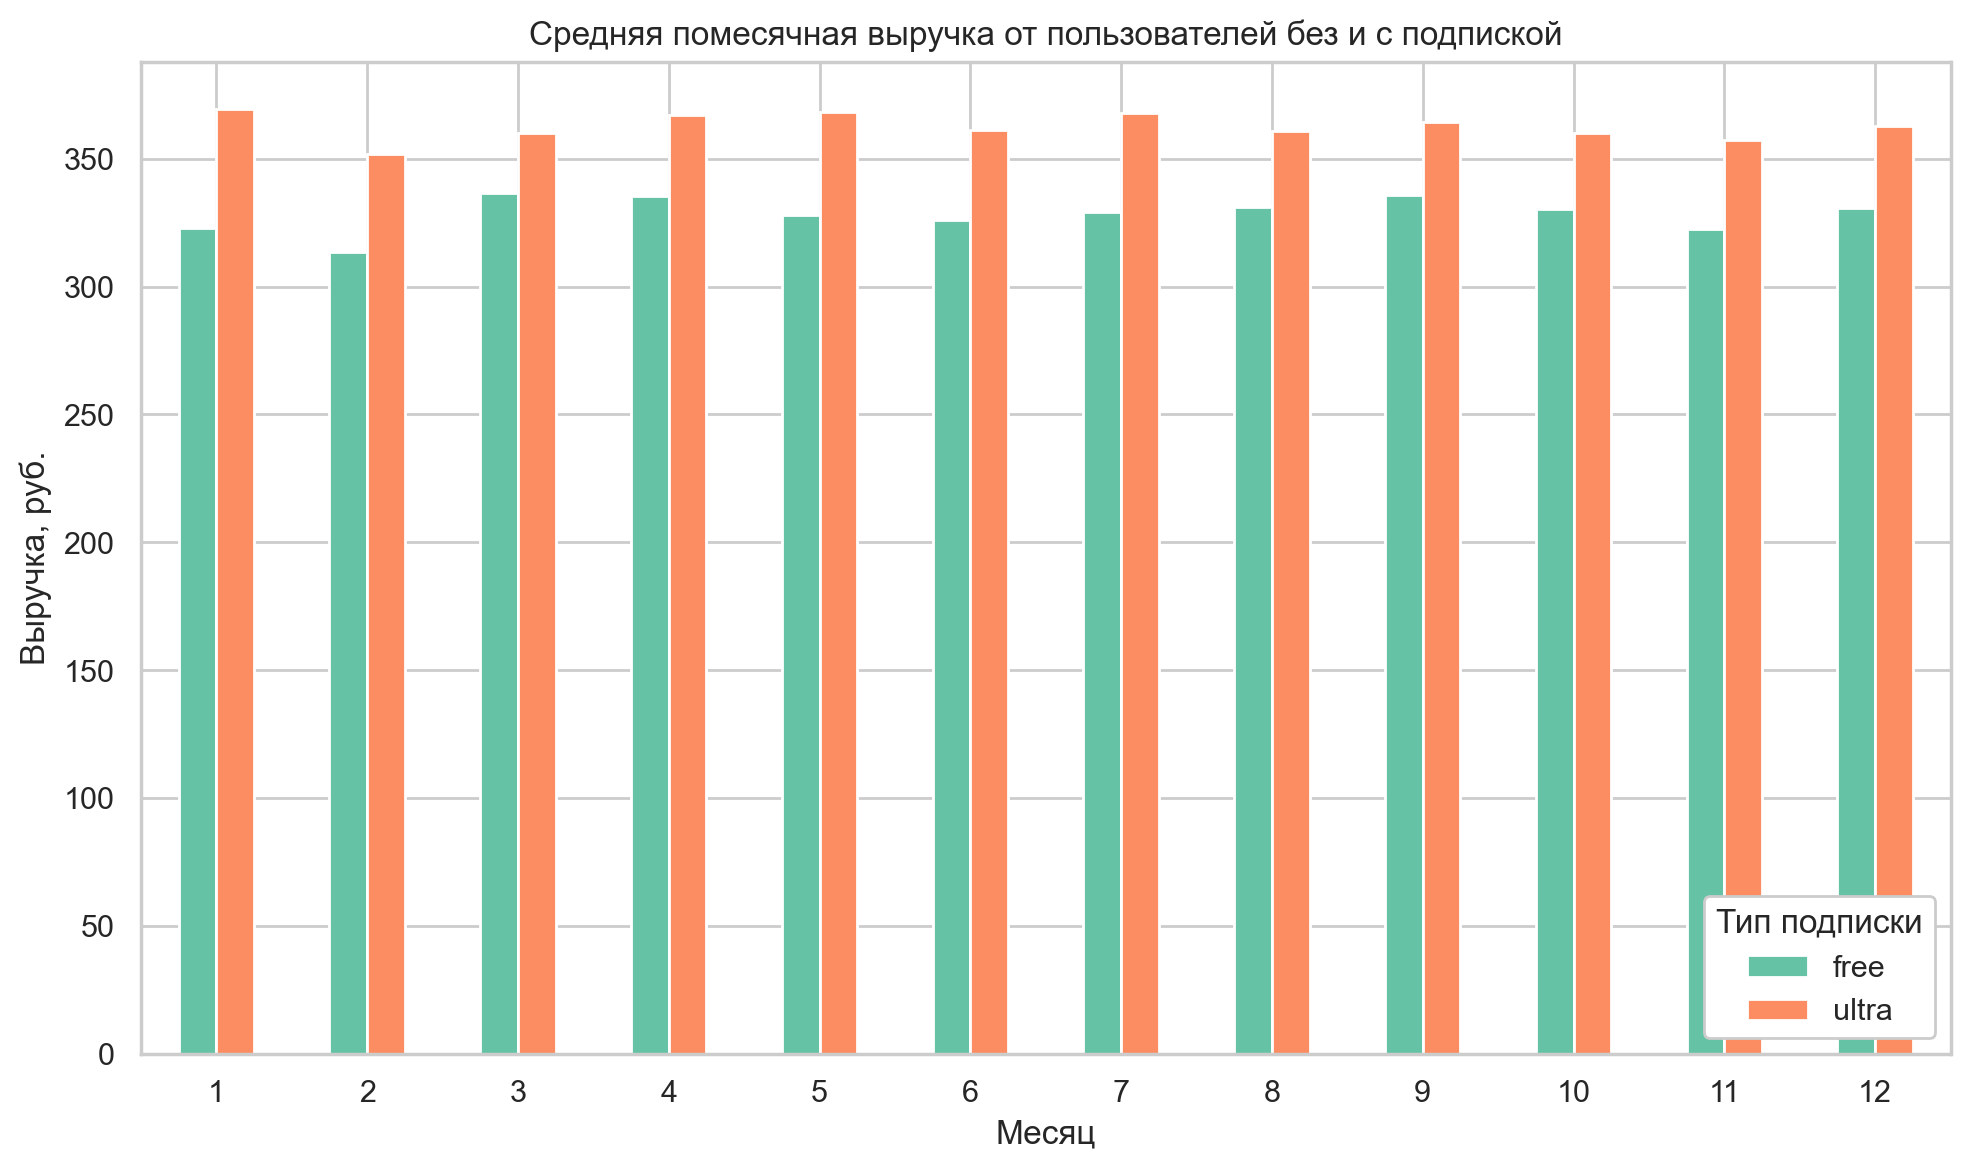

In [594]:
# Создаем столбчатую диаграмму  
monthly_revenue.plot(kind='bar', figsize=(10, 6))  
# Настройки графика  
plt.xlabel('Месяц')  
plt.ylabel('Выручка, руб.')
plt.title('Средняя помесячная выручка от пользователей без и с подпиской')  
plt.xticks(rotation=0)  # Вертикальная ориентация значений по оси X  
plt.legend(title='Тип подписки', loc='lower right', framealpha=1)  
# Показываем график  
plt.tight_layout()  
plt.show()

**Вывод:** гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, подвердилась на уровне значимости 0,01. Среднее различие между категориями пользователей составило 34,07 руб. Средняя выручка пользователей с подпиской 362,67 руб., тогда как пользователей без подписки - 328,6 руб.

**Выводы по гипотезам на основе проведенного анализа данных**:
1. Гипотеза о том, что "пользователи с подпиской больше времени на поездки", потвердилась на уровне значимости 0,01. Различие составило 1,2 мин. В среднем пользователи с подпиской тратят 18,5 мин на поездку, без подписки - 17,4 мин.
2. Гипотеза о том, что "среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров", не подвердилась: недостаточно доказательств, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не равно 3130 метров.
3. Гипотеза о том, что "помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки", подвердилась на уровне значимости 0,01. Среднее различие между категориями пользователей составило 34,07 руб. Средняя выручка пользователей с подпиской 362,67 руб., тогда как пользователей без подписки - 328,6 руб.

**Вопрос**: Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ**: для этого необходимо воспользоваться односторонним т-тестом для двух зависимых выборок, где нулевая гипотеза была сформулированна как "количество обращений в техподдержку не изменилось", альтернативная - "количество обращений в техподдержку значимо снизилось".
Для рассчета в питоне использовали бы функцию ttest_rel из библиотеки scipy.stats с параметром alternative 'greater'.

## Распределения

1. Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.


2. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.



### 100 новых клиентов после акции бесплатный месяц подписки

**Полученные данные:** после бесплатного пробного периода подписку продлевают 10% пользователей.

**Задача:** вычислить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план - 100 новых клиентов продлили подписку -  была примерно 5%.

Чтобы выяснить, скольким пользователей необходимо отправить промокод, чтобы 100 из них продлили подписку с учетом практических данных, рассчитаем:

In [602]:
# Заданные параметры  
p = 0.1  # вероятность продления  
k = 100  # необходимое количество продлений  
alpha = 0.05  # уровень значимости   

# Итерируем для нахождения минимального n  
n = 1  
while True:  
    mu = n * p  
    sigma = math.sqrt(n * p * (1 - p))  
    if st.norm.cdf(k, mu, sigma) < alpha:  
        break  
    n += 1  

print(f"Минимальное количество промокодов, которое нужно разослать: {n}")

Минимальное количество промокодов, которое нужно разослать: 1169


Таким образом минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план "100 новых клиентов" была на уровне 5%, составляет 1169.

### Просмотр push-уведомления в мобильном приложении

**Условия**: Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 

**Задача**: постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [605]:
# задаём параметры биномиального распределения
n = 1_000_000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = math.sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399,5 тыс. пользователей
result = distr.cdf(399_500)
print(f"Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {round(result * 100, 2)}%")

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


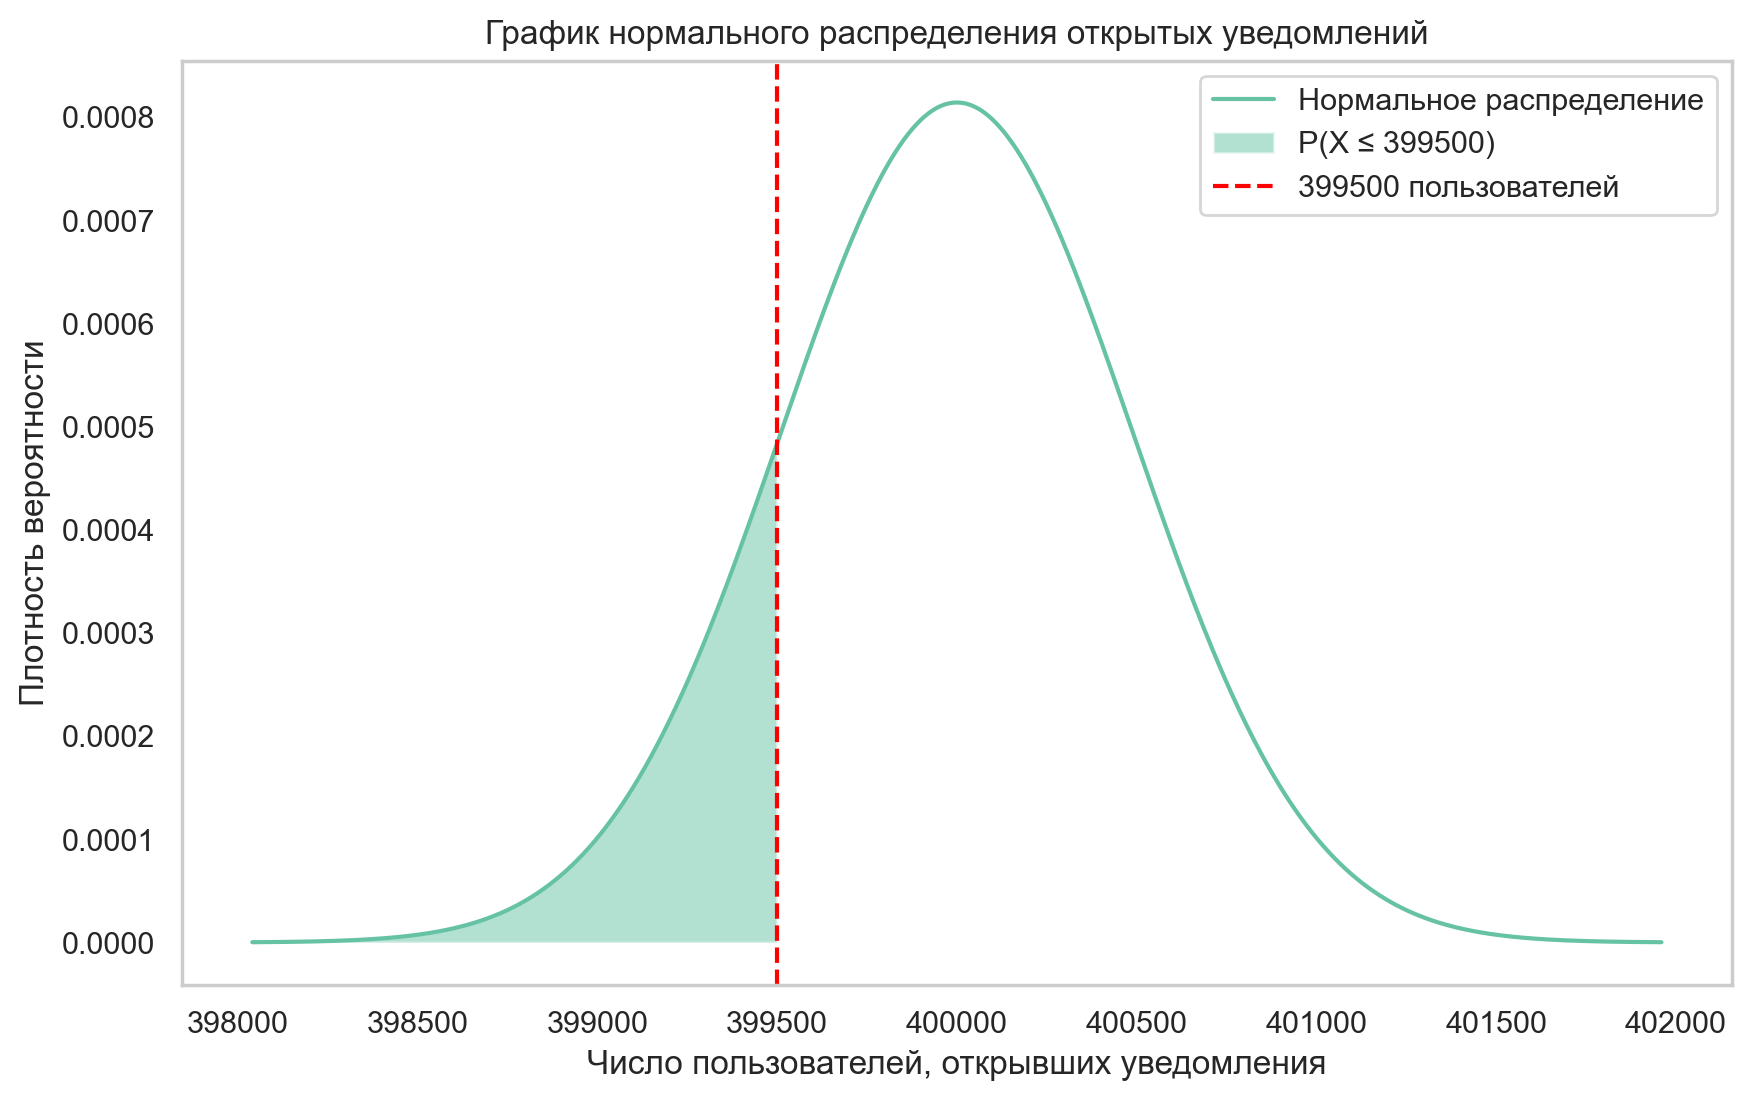

In [606]:
# Генерируем точки для построения графика  
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)  
y = st.norm.pdf(x, mu, sigma)  

# Построение графика  
plt.figure(figsize=(10, 6))  
plt.plot(x, y, label='Нормальное распределение')  
plt.fill_between(x, y, where=(x <= 399500), alpha=0.5, label='P(X ≤ 399500)')  
plt.title('График нормального распределения открытых уведомлений')  
plt.xlabel('Число пользователей, открывших уведомления')  
plt.ylabel('Плотность вероятности')  
plt.axvline(399500, color='red', linestyle='--', label='399500 пользователей')  
plt.legend()  
plt.grid()  
plt.show() 

**Выводы по задачам:**

1. минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план "100 новых клиентов" была на уровне 5%, составляет 1169.
2. Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%.

## Итоги исследования

**Получили таблицы со следующими данными**:

1. Пользователи — users_go.csv: 
- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

2. Поездки — rides_go.csv:
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

3. Подписки — subscriptions_go.csv
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

**Провели этапы обработки**:

- в таблице данные пользователей были обнаружены строки-дубликаты, удалили их;
- в таблице поездки столбец дата изменили тип данных на дату.

**На основе исследования данных сделали следующие выводы**:
- больше всего сервисом пользуются пользователи из города Пятигорск – 226. В тройку также входят Екатеринбург и Ростов-на-Дону, которые имеют близкие значения – 206 и 202 соотвествтенно. Пользователи из городов Краснодар, Сочи, Омск и Тюмень распределены от 185 до 196. Наименьшую популярность имеет город Москва - 172 пользователей;
- пользователей без подписки 846, их количество больше на 15% чем тех, кто приобрел подписку;
- Средний возраст пользователя - 25 лет, половина всех – молодежь от 22 до 28 лет;
- 3/4 поездок имели дистанцию более 2,5 км, в среднем пользователи проезжали 3,1 км. 50% от всех поездок были совершены на дистанцию в диапозоне от 2,5 до 3,8 км;
- 3/4 всех поездок длилась более 13 мин. В среднем пользователи проезжали 18 мин. Половина всех поездок длилась от 13 до 22 мин.
- пользователи без подписки совершали больше поездок, есть два пика: 500 м и 3 км, схожее распределение у пользователей с подпиской - 1 и 3 км. Видим различия в 3,3% в распределении между двумя группами: пользователи с подпиской чаще совершали поездки, близкие по дистанции к 3,1 км, тогда как пользователи без подписки - 3 км.
- по времени обе категории пользователей имют подобное нормальное распределение, различие в среднем длительности поездки равна 5,5% – пользователи с подпиской проезжали в среднем 18,5 мин, без подписки – 17,4 мин.
- выручка за 2021 составила 3 878 641 рублей. Самыми прибыльными месяцами, которые принесли более 330 тыс. рублей, являются январь, май и июнь. Меньше всего принесли февраль и ноябырь - 290 428 и 305 622 рублей соответственно.

**Выводы по гипотезам на основе проведенного анализа данных**:
1. Гипотеза о том, что "пользователи с подпиской больше времени на поездки", потвердилась на уровне значимости 0,01. Различие составило 1,2 мин. В среднем пользователи с подпиской тратят 18,5 мин на поездку, без подписки - 17,4 мин.
2. Гипотеза о том, что "среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров", не подвердилась: недостаточно доказательств, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не равно 3130 метров.
3. Гипотеза о том, что "помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки", подвердилась на уровне значимости 0,01. Среднее различие между категориями пользователей составило 34,07 руб. Средняя выручка пользователей с подпиской 362,67 руб., тогда как пользователей без подписки - 328,6 руб.

Ответили на вопрос "Какой тест вам понадобился бы для проверки гипотезы  о том, что количество обращений в техподдержку значимо снизилось после обновления сервера?" следующим образом: для этого необходимо воспользоваться односторонним т-тестом для двух зависимых выборок, где нулевая гипотеза была сформулированна как "количество обращений в техподдержку не изменилось", альтернативная - "количество обращений в техподдержку значимо снизилось".

**Выводы по задачам по распределениям:** 
1. минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план "100 новых клиентов" была на уровне 5%, составляет 1169.
2. Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%
